In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!wget "https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-images-small.tar"

--2025-05-03 14:28:38--  https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-images-small.tar
Resolving amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)... 16.15.200.92, 52.217.227.233, 52.217.205.193, ...
Connecting to amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)|16.15.200.92|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3253381120 (3.0G) [application/x-tar]
Saving to: ‘abo-images-small.tar’

abo-images-small.ta 100%[===================>]   3.03G  43.4MB/s    in 79s     

2025-05-03 14:29:57 (39.1 MB/s) - ‘abo-images-small.tar’ saved [3253381120/3253381120]



In [3]:
!tar -xf /kaggle/working/abo-images-small.tar

In [4]:
import os
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm # Use tqdm.notebook for Kaggle/Jupyter environments

# Define the base directory where images/small was unzipped
base_image_dir = '/kaggle/working/images/small'

# List all subfolders
subfolders = [d for d in os.listdir(base_image_dir) if os.path.isdir(os.path.join(base_image_dir, d))]

print(f"Found {len(subfolders)} subfolders in {base_image_dir}")

analysis_results = []
total_images_count = 0

# Use tqdm to wrap the subfolders loop for a progress bar
# desc is the description shown next to the progress bar
for folder_name in tqdm(subfolders, desc="Analyzing subfolders"):
    folder_path = os.path.join(base_image_dir, folder_name)
    # List all files in the folder. You might want to add checks for image extensions here.
    all_files_in_folder = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    folder_image_count = 0
    image_formats = set()
    image_dimensions = []
    corrupted_count = 0

    # Iterate through files in the subfolder
    # Optionally, you could add a second, inner tqdm bar here for files,
    # but iterating through subfolders is usually sufficient granularity.
    for file_name in all_files_in_folder:
        image_path = os.path.join(folder_path, file_name)
        try:
            # Open image using Pillow to get metadata
            with Image.open(image_path) as img:
                # Basic check if it's likely an image (Pillow can open many things)
                img.verify() # Verify the file integrity
                img = Image.open(image_path) # Re-open after verify
                img.load() # Load the image data

                folder_image_count += 1
                image_formats.add(img.format)
                image_dimensions.append(img.size) # (width, height)
        except Exception as e:
            corrupted_count += 1
            # print(f"Could not process {image_path}: {e}") # Optional: uncomment to see errors

    total_images_count += folder_image_count

    # Calculate average dimensions if images were found
    avg_width, avg_height = 0, 0
    if folder_image_count > 0:
        # Ensure dimensions list is not empty before calculating avg
        if image_dimensions:
            avg_width = sum([dim[0] for dim in image_dimensions]) / len(image_dimensions)
            avg_height = sum([dim[1] for dim in image_dimensions]) / len(image_dimensions)


    analysis_results.append({
        'Subfolder': folder_name,
        'Image Count': folder_image_count,
        'Formats Found': ', '.join(list(image_formats)) if image_formats else 'None',
        'Avg Dimensions (WxH)': f"{avg_width:.0f}x{avg_height:.0f}",
        'Corrupted/Unreadable': corrupted_count
    })

# Create a pandas DataFrame for better readability
df_analysis = pd.DataFrame(analysis_results)

# Sort by image count descending
df_analysis = df_analysis.sort_values(by='Image Count', ascending=False).reset_index(drop=True)

print(f"\nTotal images processed across all folders: {total_images_count}")
print("\nAnalysis Summary per Subfolder:")
print(df_analysis.to_string(index=False))

# Optional: Overall stats
print("\nOverall Image Format Distribution:")
all_formats = [fmt for sub_formats in df_analysis['Formats Found'] for fmt in sub_formats.split(', ') if fmt != 'None']
if all_formats:
    print(pd.Series(all_formats).value_counts())

Found 256 subfolders in /kaggle/working/images/small


Analyzing subfolders:   0%|          | 0/256 [00:00<?, ?it/s]


Total images processed across all folders: 398212

Analysis Summary per Subfolder:
Subfolder  Image Count Formats Found Avg Dimensions (WxH)  Corrupted/Unreadable
       bb         1678          JPEG              231x236                     0
       0b         1662          JPEG              232x237                     0
       0d         1649          JPEG              228x240                     0
       43         1645          JPEG              231x236                     0
       0c         1642          JPEG              229x240                     0
       9e         1637          JPEG              230x238                     0
       98         1637          JPEG              230x239                     0
       7a         1635          JPEG              230x236                     0
       39         1633          JPEG              231x239                     0
       e7         1630          JPEG              230x237                     0
       ce         1629          JPEG

In [5]:
!wget "https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-listings.tar"

--2025-05-03 14:33:58--  https://amazon-berkeley-objects.s3.amazonaws.com/archives/abo-listings.tar
Resolving amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)... 16.15.184.255, 3.5.16.97, 16.182.103.209, ...
Connecting to amazon-berkeley-objects.s3.amazonaws.com (amazon-berkeley-objects.s3.amazonaws.com)|16.15.184.255|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87480320 (83M) [application/x-tar]
Saving to: ‘abo-listings.tar’

abo-listings.tar    100%[===================>]  83.43M  30.5MB/s    in 2.7s    

2025-05-03 14:34:01 (30.5 MB/s) - ‘abo-listings.tar’ saved [87480320/87480320]



In [6]:
!tar -xf "/kaggle/working/abo-listings.tar"

In [7]:
!gunzip /kaggle/working/images/metadata/images.csv.gz

In [8]:
import pandas as pd
meta = pd.read_csv("/kaggle/working/images/metadata/images.csv")
meta.head()

,image_id,height,width,path
0,010-mllS7JL,106,106,14/14fe8812.jpg
1,01dkn0Gyx0L,122,122,da/daab0cad.jpg
2,01sUPg0387L,111,111,d2/d2daaae9.jpg
3,1168jc-5r1L,186,186,3a/3a4e88e6.jpg
4,11RUV5Fs65L,30,500,d9/d91ab9cf.jpg


In [9]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398212 entries, 0 to 398211
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   image_id  398212 non-null  object
 1   height    398212 non-null  int64 
 2   width     398212 non-null  int64 
 3   path      398212 non-null  object
dtypes: int64(2), object(2)
memory usage: 12.2+ MB


In [10]:
# Choose one file to extract, e.g., listings_2.json.gz
input_gz_file = '/kaggle/working/listings/metadata/listings_2.json.gz'
output_json_file = '/kaggle/working/listings/metadata/listings_2.json'

# Use gunzip to decompress the file and save it
!gunzip -c {input_gz_file} > {output_json_file}

print(f"Extracted {input_gz_file} to {output_json_file}")

Extracted /kaggle/working/listings/metadata/listings_2.json.gz to /kaggle/working/listings/metadata/listings_2.json


In [11]:
import json
import pandas as pd
import os

# Define the path to the extracted JSON file
json_file_path = '/kaggle/working/listings/metadata/listings_2.json'

# Check if the file exists
if not os.path.exists(json_file_path):
    print(f"Error: {json_file_path} not found. Make sure the unzip step was successful.")
else:
    # Load the JSON data - processing line by line
    print(f"Loading data from {json_file_path} line by line...")
    data = []
    corrupted_lines = 0
    with open(json_file_path, 'r') as f:
        # Iterate through each line in the file
        for line in f:
            # Strip leading/trailing whitespace (like newline characters)
            line = line.strip()
            # Skip empty lines
            if not line:
                continue
            try:
                # Parse the JSON object from the current line
                json_object = json.loads(line)
                data.append(json_object)
            except json.JSONDecodeError as e:
                corrupted_lines += 1
                # Optional: print the problematic line or error for debugging
                # print(f"Could not decode JSON on line: {line[:100]}... Error: {e}")
            except Exception as e:
                corrupted_lines += 1
                # Optional: handle other potential errors during line processing
                # print(f"An unexpected error occurred processing line: {line[:100]}... Error: {e}")


    print("Finished loading data.")
    if corrupted_lines > 0:
        print(f"Warning: Skipped {corrupted_lines} line(s) due to JSON decode errors.")


    print("\nAnalysis of the JSON data:")

    # Now 'data' is a list of dictionaries (one for each valid JSON line)
    print(f"- Data type after processing: {type(data)}")
    print(f"- Number of records (items in list): {len(data)}")


    # 2. Show keys of the first record (if the list is not empty and contains dicts)
    if data and isinstance(data[0], dict):
        print(f"- Keys in the first record: {list(data[0].keys())}")

        # 3. Show the first record as an example
        print("\n- First record example:")
        # Use json.dumps for pretty printing
        print(json.dumps(data[0], indent=4))

        # 4. (Optional) Load into pandas for structured analysis
        try:
            # Create DataFrame from the list of dictionaries
            df = pd.DataFrame(data)
            print("\n- Pandas DataFrame Info (Columns, Non-Null Counts, Types):")
            df.info()

            print("\n- First 5 rows of DataFrame:")
            print(df.head())

        except Exception as e:
            print(f"\nCould not load data into pandas DataFrame: {e}")
            print("This might happen if records have drastically different structures.")


    elif data:
         print("- The list contains items, but the first item is not a dictionary.")
    else:
        # This happens if len(data) is 0 after processing
        print("- No valid JSON objects were loaded from the file.")

Loading data from /kaggle/working/listings/metadata/listings_2.json line by line...
Finished loading data.

Analysis of the JSON data:
- Data type after processing: <class 'list'>
- Number of records (items in list): 9232
- Keys in the first record: ['brand', 'bullet_point', 'color', 'fabric_type', 'item_id', 'item_name', 'model_name', 'model_number', 'product_type', 'style', 'main_image_id', 'country', 'marketplace', 'domain_name', 'node']

- First record example:
{
    "brand": [
        {
            "language_tag": "de_DE",
            "value": "Amazon Essentials"
        }
    ],
    "bullet_point": [
        {
            "language_tag": "de_DE",
            "value": "F\u00e4llt gross aus; eventuell eine Gr\u00f6\u00dfe kleiner bestellen"
        }
    ],
    "color": [
        {
            "language_tag": "de_DE",
            "value": "Mehrfarbig(Girl Fruit)"
        }
    ],
    "fabric_type": [
        {
            "language_tag": "en_GB",
            "value": "100% Cotton"


In [12]:
df.head()

,brand,bullet_point,color,fabric_type,item_id,item_name,model_name,model_number,product_type,style,...,item_keywords,material,spin_id,3dmodel_id,color_code,model_year,pattern,product_description,finish_type,item_shape
0,"[{'language_tag': 'de_DE', 'value': 'Amazon Es...","[{'language_tag': 'de_DE', 'value': 'Fällt gro...","[{'language_tag': 'de_DE', 'value': 'Mehrfarbi...","[{'language_tag': 'en_GB', 'value': '100% Cott...",B07HL25ZQM,"[{'language_tag': 'en_GB', 'value': 'Amazon Es...","[{'language_tag': 'en_GB', 'value': '6-Pack Bi...",[{'value': 'P_AE3131_M6'}],[{'value': 'BABY_PRODUCT'}],"[{'language_tag': 'de_DE', 'value': '6-Pack Bi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"[{'language_tag': 'en_GB', 'value': 'AmazonBas...","[{'language_tag': 'en_GB', 'value': 'Large dry...",NaN,NaN,B0825D4F6R,"[{'language_tag': 'en_GB', 'value': 'AmazonBas...",NaN,[{'value': 'AMAZ2001'}],[{'value': 'HOME'}],"[{'language_tag': 'en_GB', 'value': 'Deluxe'}]",...,"[{'language_tag': 'en_GB', 'value': 'tower lau...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': '3D Printe...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,B07TF1FCFD,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Samsung G...",[{'value': 'gz8587-SL40668'}],[{'value': 'CELLULAR_PHONE_CASE'}],NaN,...,"[{'language_tag': 'en_IN', 'value': 'mobile co...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Snug fit ...","[{'language_tag': 'en_IN', 'standardized_value...",NaN,B08569SRJD,"[{'language_tag': 'en_IN', 'value': 'Amazon Br...","[{'language_tag': 'en_IN', 'value': 'Nokia 7.2'}]",[{'value': 'UV10845-SL40357'}],[{'value': 'CELLULAR_PHONE_CASE'}],NaN,...,"[{'language_tag': 'en_IN', 'value': 'Back Cove...","[{'language_tag': 'en_IN', 'value': 'Silicon'}]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[{'language_tag': 'en_US', 'value': 'Stone & B...","[{'language_tag': 'en_US', 'value': 'With mode...","[{'language_tag': 'en_US', 'value': 'Dark Grey'}]",NaN,B07B4G5RBN,"[{'language_tag': 'zh_CN', 'value': 'Stone & B...",NaN,[{'value': 'UPH10095B'}],[{'value': 'CHAIR'}],NaN,...,"[{'language_tag': 'en_US', 'value': 'living-ro...","[{'language_tag': 'zh_CN', 'value': '灰石色'}, {'...",485925ed,B07B4G5RBN,[#918F8C],NaN,NaN,NaN,NaN,NaN


In [13]:
import json
import pandas as pd
import os
from tqdm.notebook import tqdm # For progress bar

# Define the path to the extracted JSON file
json_file_path = '/kaggle/working/listings/metadata/listings_2.json'
output_csv_path = '/kaggle/working/listings/metadata/listings_2_en.csv' # Output CSV file path

# Check if the JSON file exists
if not os.path.exists(json_file_path):
    print(f"Error: {json_file_path} not found. Make sure the unzip step was successful.")
else:
    # --- Step 1: Load the JSON data line by line ---
    print(f"Loading data from {json_file_path} line by line...")
    data = []
    corrupted_lines = 0
    # Get the total number of lines for the progress bar (optional, but good for large files)
    try:
        total_lines = sum(1 for line in open(json_file_path, 'r'))
    except Exception:
        total_lines = None # Fallback if counting lines fails

    with open(json_file_path, 'r') as f:
        # Wrap the file object with tqdm for a progress bar
        for line in tqdm(f, total=total_lines, desc="Reading JSON Lines"):
            line = line.strip()
            if not line:
                continue
            try:
                json_object = json.loads(line)
                data.append(json_object)
            except json.JSONDecodeError as e:
                corrupted_lines += 1
                # print(f"Could not decode JSON on line: {line[:100]}... Error: {e}") # Uncomment for debugging

    print("Finished loading data.")
    if corrupted_lines > 0:
        print(f"Warning: Skipped {corrupted_lines} line(s) due to JSON decode errors.")

    # --- Step 2: Process data and extract English values ---
    print("Processing records and extracting English values...")
    processed_data = []

    # Function to extract English value from a list of language-tagged dicts
    def get_english_value(lang_list):
        if isinstance(lang_list, list):
            for item in lang_list:
                if isinstance(item, dict) and 'language_tag' in item and 'value' in item:
                    # Check if language tag starts with 'en' (covers en_GB, en_US, etc.)
                    if item['language_tag'].lower().startswith('en'):
                        return item['value']
        return None # Return None if no English value is found or input is not a list

    # Function to extract value from a list of dicts without language tags (like model_number, product_type)
    def get_simple_value_from_list(simple_list):
        if isinstance(simple_list, list) and len(simple_list) > 0:
             # Assuming the first item is the relevant one and it's a dict with 'value'
             if isinstance(simple_list[0], dict) and 'value' in simple_list[0]:
                 return simple_list[0]['value']
             # Handle node list specifically - extract node_id and node_name
             if isinstance(simple_list[0], dict) and 'node_id' in simple_list[0] and 'node_name' in simple_list[0]:
                  # Return the first node's id and name as a tuple or dict if needed
                  # For CSV, let's return them separately in the main loop
                  pass # Handled below in the main loop
        return None # Return None if list is empty or structure is unexpected

    # Iterate through each record loaded from the JSON
    for record in tqdm(data, desc="Extracting English data"):
        processed_record = {}

        # Extract simple fields directly
        processed_record['item_id'] = record.get('item_id')
        processed_record['main_image_id'] = record.get('main_image_id')
        processed_record['country'] = record.get('country')
        processed_record['marketplace'] = record.get('marketplace')
        processed_record['domain_name'] = record.get('domain_name')

        # Extract English values from language-tagged lists
        processed_record['brand_en'] = get_english_value(record.get('brand'))
        processed_record['bullet_point_en'] = get_english_value(record.get('bullet_point'))
        processed_record['color_en'] = get_english_value(record.get('color'))
        processed_record['fabric_type_en'] = get_english_value(record.get('fabric_type'))
        processed_record['item_name_en'] = get_english_value(record.get('item_name'))
        processed_record['model_name_en'] = get_english_value(record.get('model_name'))
        processed_record['style_en'] = get_english_value(record.get('style'))

        # Extract values from non-language-tagged lists (assuming first item's value)
        processed_record['model_number'] = get_simple_value_from_list(record.get('model_number'))
        processed_record['product_type'] = get_simple_value_from_list(record.get('product_type'))

        # Extract node information (taking the first node if available)
        nodes = record.get('node')
        if isinstance(nodes, list) and len(nodes) > 0 and isinstance(nodes[0], dict):
            processed_record['node_id'] = nodes[0].get('node_id')
            processed_record['node_name'] = nodes[0].get('node_name')
        else:
            processed_record['node_id'] = None
            processed_record['node_name'] = None


        processed_data.append(processed_record)

    # --- Step 3: Create pandas DataFrame ---
    print("Creating pandas DataFrame...")
    df = pd.DataFrame(processed_data)

    # --- Step 4: Save DataFrame to CSV ---
    print(f"Saving DataFrame to CSV: {output_csv_path}")
    df.to_csv(output_csv_path, index=False) # index=False prevents writing the DataFrame index as a column

    print("CSV file created successfully.")
    print("\nFirst 5 rows of the created CSV DataFrame:")
    print(df.head().to_string()) # Use to_string to display all columns

    print(f"\nDataFrame shape: {df.shape}")
    print("\nDataFrame Info (Columns, Non-Null Counts, Types):")
    df.info()



Loading data from /kaggle/working/listings/metadata/listings_2.json line by line...


Reading JSON Lines:   0%|          | 0/9232 [00:00<?, ?it/s]

Finished loading data.
Processing records and extracting English values...


Extracting English data:   0%|          | 0/9232 [00:00<?, ?it/s]

Creating pandas DataFrame...
Saving DataFrame to CSV: /kaggle/working/listings/metadata/listings_2_en.csv
CSV file created successfully.

First 5 rows of the created CSV DataFrame:
      item_id main_image_id country marketplace   domain_name               brand_en                                                                                                                                                                                                                                         bullet_point_en    color_en fabric_type_en                                                                                                   item_name_en           model_name_en style_en     model_number         product_type       node_id                                                                                                         node_name
0  B07HL25ZQM   718mYsQTQbL      DE      Amazon     amazon.de                   None                                                                 

In [14]:
import os
import json
import pandas as pd
import gzip # To read .gz files directly
from tqdm.notebook import tqdm # For progress bars

# Define the directory containing the .json.gz files
input_dir = '/kaggle/working/listings/metadata'
# Define the output directory for CSV files (can be the same)
output_dir = '/kaggle/working/listings/metadata'

# --- Helper Functions ---

def get_english_value(lang_list):
    """Extracts the English value from a list of language-tagged dictionaries."""
    if isinstance(lang_list, list):
        for item in lang_list:
            if isinstance(item, dict) and 'language_tag' in item and 'value' in item:
                # Check if language tag starts with 'en' (covers en_GB, en_US, etc.)
                if item['language_tag'].lower().startswith('en'):
                    return item['value']
    return None # Return None if no English value is found or input is not a list

def get_simple_value_from_list(simple_list):
    """Extracts the 'value' from the first dictionary in a list without language tags."""
    if isinstance(simple_list, list) and len(simple_list) > 0:
         # Assuming the first item is the relevant one and it's a dict with 'value'
         if isinstance(simple_list[0], dict) and 'value' in simple_list[0]:
             return simple_list[0]['value']
    return None # Return None if list is empty or structure is unexpected

def process_single_listing_file(gz_file_path, output_csv_path):
    """Reads a single .json.gz file, processes it, and saves as CSV."""
    data = []
    corrupted_lines = 0

    try:
        # Open the .gz file for reading in text mode ('rt') with gzip
        with gzip.open(gz_file_path, 'rt', encoding='utf-8') as f:
            # Read lines into a list first to get total count for tqdm
            lines = f.readlines()

        # Process each line
        for line in tqdm(lines, desc=f"Processing {os.path.basename(gz_file_path)}", leave=False): # leave=False cleans up inner bar
            line = line.strip()
            if not line:
                continue
            try:
                json_object = json.loads(line)
                data.append(json_object)
            except json.JSONDecodeError as e:
                corrupted_lines += 1
                # print(f"Could not decode JSON on line: {line[:100]}... Error: {e}") # Uncomment for debugging
            except Exception as e:
                 corrupted_lines += 1
                 # print(f"An unexpected error occurred processing line: {line[:100]}... Error: {e}") # Uncomment for debugging


        if corrupted_lines > 0:
            print(f"  Warning for {os.path.basename(gz_file_path)}: Skipped {corrupted_lines} line(s) due to JSON decode errors.")

        # Process loaded data and extract values
        processed_data = []
        for record in data:
            processed_record = {}

            # Extract simple fields directly
            processed_record['item_id'] = record.get('item_id')
            processed_record['main_image_id'] = record.get('main_image_id')
            processed_record['country'] = record.get('country')
            processed_record['marketplace'] = record.get('marketplace')
            processed_record['domain_name'] = record.get('domain_name')

            # Extract English values from language-tagged lists
            processed_record['brand_en'] = get_english_value(record.get('brand'))
            processed_record['bullet_point_en'] = get_english_value(record.get('bullet_point'))
            processed_record['color_en'] = get_english_value(record.get('color'))
            processed_record['fabric_type_en'] = get_english_value(record.get('fabric_type'))
            processed_record['item_name_en'] = get_english_value(record.get('item_name'))
            processed_record['model_name_en'] = get_english_value(record.get('model_name'))
            processed_record['style_en'] = get_english_value(record.get('style'))

            # Extract values from non-language-tagged lists
            processed_record['model_number'] = get_simple_value_from_list(record.get('model_number'))
            processed_record['product_type'] = get_simple_value_from_list(record.get('product_type'))

            # Extract node information (taking the first node if available)
            nodes = record.get('node')
            if isinstance(nodes, list) and len(nodes) > 0 and isinstance(nodes[0], dict):
                processed_record['node_id'] = nodes[0].get('node_id')
                processed_record['node_name'] = nodes[0].get('node_name')
            else:
                processed_record['node_id'] = None
                processed_record['node_name'] = None

            processed_data.append(processed_record)

        # Create pandas DataFrame
        df = pd.DataFrame(processed_data)

        # Save DataFrame to CSV
        df.to_csv(output_csv_path, index=False)

        print(f"Successfully processed {os.path.basename(gz_file_path)} -> {os.path.basename(output_csv_path)} ({len(df)} records)")

    except FileNotFoundError:
        print(f"Error: File not found at {gz_file_path}")
    except Exception as e:
        print(f"An error occurred while processing {os.path.basename(gz_file_path)}: {e}")


# --- Main Processing Logic ---

# List all .json.gz files in the input directory
listing_files_gz = [f for f in os.listdir(input_dir) if f.endswith('.json.gz')]

if not listing_files_gz:
    print(f"No .json.gz files found in {input_dir}")
else:
    print(f"Found {len(listing_files_gz)} .json.gz files to process.")

    # Process each file with an outer progress bar
    for gz_filename in tqdm(listing_files_gz, desc="Overall File Progress"):
        gz_file_path = os.path.join(input_dir, gz_filename)
        # Construct output CSV filename (replace .json.gz with _en.csv)
        csv_filename = gz_filename.replace('.json.gz', '_en.csv')
        output_csv_path = os.path.join(output_dir, csv_filename)

        # Process the current file
        process_single_listing_file(gz_file_path, output_csv_path)

    print("\nFinished processing all listing files.")



Found 16 .json.gz files to process.


Overall File Progress:   0%|          | 0/16 [00:00<?, ?it/s]

Processing listings_f.json.gz:   0%|          | 0/9222 [00:00<?, ?it/s]

Successfully processed listings_f.json.gz -> listings_f_en.csv (9222 records)


Processing listings_1.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_1.json.gz -> listings_1_en.csv (9232 records)


Processing listings_d.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_d.json.gz -> listings_d_en.csv (9232 records)


Processing listings_4.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_4.json.gz -> listings_4_en.csv (9232 records)


Processing listings_2.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_2.json.gz -> listings_2_en.csv (9232 records)


Processing listings_e.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_e.json.gz -> listings_e_en.csv (9232 records)


Processing listings_b.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_b.json.gz -> listings_b_en.csv (9232 records)


Processing listings_0.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_0.json.gz -> listings_0_en.csv (9232 records)


Processing listings_c.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_c.json.gz -> listings_c_en.csv (9232 records)


Processing listings_9.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_9.json.gz -> listings_9_en.csv (9232 records)


Processing listings_6.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_6.json.gz -> listings_6_en.csv (9232 records)


Processing listings_a.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_a.json.gz -> listings_a_en.csv (9232 records)


Processing listings_5.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_5.json.gz -> listings_5_en.csv (9232 records)


Processing listings_7.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_7.json.gz -> listings_7_en.csv (9232 records)


Processing listings_3.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_3.json.gz -> listings_3_en.csv (9232 records)


Processing listings_8.json.gz:   0%|          | 0/9232 [00:00<?, ?it/s]

Successfully processed listings_8.json.gz -> listings_8_en.csv (9232 records)

Finished processing all listing files.


In [15]:
import os
import pandas as pd
from tqdm.notebook import tqdm # For progress bar

# Define the directory containing the CSV files
csv_dir = '/kaggle/working/listings/metadata'
# Define the path for the final merged CSV file
merged_csv_path = '/kaggle/working/listings/metadata/all_listings_en_merged.csv'

# --- Step 1: List all CSV files to merge ---
# Find all files ending with '_en.csv' in the specified directory
csv_files_to_merge = [f for f in os.listdir(csv_dir) if f.endswith('_en.csv')]

if not csv_files_to_merge:
    print(f"No CSV files ending with '_en.csv' found in {csv_dir}. Nothing to merge.")
else:
    print(f"Found {len(csv_files_to_merge)} CSV files to merge.")

    # --- Step 2: Read and concatenate CSV files ---
    all_dataframes = []

    # Use tqdm to show progress while reading files
    for csv_filename in tqdm(csv_files_to_merge, desc="Reading CSV files"):
        csv_file_path = os.path.join(csv_dir, csv_filename)
        try:
            # Read the CSV file into a pandas DataFrame
            df = pd.read_csv(csv_file_path)
            all_dataframes.append(df)
        except Exception as e:
            print(f"Error reading {csv_filename}: {e}")
            # Decide whether to skip or stop on error; here we just print and continue

    if not all_dataframes:
        print("No dataframes were successfully loaded. Cannot merge.")
    else:
        print(f"Successfully loaded {len(all_dataframes)} dataframes.")

        # Concatenate all dataframes into a single one
        print("Concatenating dataframes...")
        try:
            merged_df = pd.concat(all_dataframes, ignore_index=True) # ignore_index=True resets the index

            # --- Step 3: Save the merged DataFrame to a new CSV ---
            print(f"Saving merged DataFrame to {merged_csv_path}...")
            merged_df.to_csv(merged_csv_path, index=False) # index=False prevents writing the DataFrame index

            print("Merging complete.")
            print(f"Merged CSV saved to: {merged_csv_path}")
            print(f"Total records in merged CSV: {len(merged_df)}")

            # Optional: Display info about the merged DataFrame
            print("\nMerged DataFrame Info:")
            merged_df.info()

            print("\nFirst 5 rows of the merged DataFrame:")
            print(merged_df.head().to_string())

        except Exception as e:
            print(f"An error occurred during concatenation or saving: {e}")



Found 16 CSV files to merge.


Reading CSV files:   0%|          | 0/16 [00:00<?, ?it/s]

Successfully loaded 16 dataframes.
Concatenating dataframes...
Saving merged DataFrame to /kaggle/working/listings/metadata/all_listings_en_merged.csv...
Merging complete.
Merged CSV saved to: /kaggle/working/listings/metadata/all_listings_en_merged.csv
Total records in merged CSV: 147702

Merged DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147702 entries, 0 to 147701
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   item_id          147702 non-null  object 
 1   main_image_id    147127 non-null  object 
 2   country          147702 non-null  object 
 3   marketplace      147702 non-null  object 
 4   domain_name      147702 non-null  object 
 5   brand_en         118588 non-null  object 
 6   bullet_point_en  113478 non-null  object 
 7   color_en         98503 non-null   object 
 8   fabric_type_en   5552 non-null    object 
 9   item_name_en     122734 non-null  object 
 10  model_

In [16]:
listing = pd.read_csv("/kaggle/working/listings/metadata/all_listings_en_merged.csv")

In [17]:
listing.head()

,item_id,main_image_id,country,marketplace,domain_name,brand_en,bullet_point_en,color_en,fabric_type_en,item_name_en,model_name_en,style_en,model_number,product_type,node_id,node_name
0,B07HL25ZQM,718mYsQTQbL,DE,Amazon,amazon.de,NaN,NaN,NaN,100% Cotton,Amazon Essentials Bib Set of 6,6-Pack Bib Set,NaN,P_AE3131_M6,BABY_PRODUCT,3.968940e+09,/Kategorien/Ernährung & Stillen/Lätzchen
1,B0825D4F6R,81lg2wto16L,GB,Amazon,amazon.co.uk,AmazonBasics,"Large drying capacity, 42 metres",NaN,NaN,AmazonBasics 3-Tier Deluxe Tower Laundry Dryin...,NaN,Deluxe,AMAZ2001,HOME,3.313506e+09,/Home & Garden/Home & Kitchen/Categories/Stora...
2,B07TF1FCFD,71R4R6x-tjL,IN,Amazon,amazon.in,Amazon Brand - Solimo,3D Printed Hard Back Case Mobile Cover for Sam...,Others,NaN,Amazon Brand - Solimo Designer Number Eight 3D...,Samsung Galaxy J4 Plus,NaN,gz8587-SL40668,CELLULAR_PHONE_CASE,1.271010e+10,/Categories/Mobiles & Accessories/Mobile Acces...
3,B08569SRJD,71QSAxIJagL,IN,Amazon,amazon.in,Amazon Brand - Solimo,"Snug fit for Nokia 7.2, with perfect cut-outs ...",Multicolor,NaN,Amazon Brand - Solimo Designer Dark Night View...,Nokia 7.2,NaN,UV10845-SL40357,CELLULAR_PHONE_CASE,1.253806e+10,/Categories/Mobiles & Accessories/Mobile Acces...
4,B07B4G5RBN,91UiRD6UcHL,US,Amazon,amazon.com,Stone & Beam,With modern low-slung arms and luxuriously sof...,Dark Grey,NaN,Amazon Brand – Stone & Beam Varon Modern Loung...,NaN,NaN,UPH10095B,CHAIR,3.733601e+06,/Categories/Furniture/Living Room Furniture/Ch...


In [18]:
listing.shape

(147702, 16)

In [19]:
listing["product_type"].value_counts()[11:].sum()


43794

In [20]:
for i in listing["product_type"].value_counts()[:100]:
    print(i)

64853
12965
6546
5264
3082
2255
2100
2009
1845
1540
1449
1377
1362
1199
1152
1137
1064
972
936
860
817
792
756
706
655
645
635
599
579
544
544
476
457
452
429
416
403
393
390
380
379
373
336
329
301
299
297
293
287
287
275
273
263
259
258
257
247
243
241
240
236
229
221
214
207
204
201
188
180
176
168
167
167
166
165
164
163
156
154
152
152
152
151
149
149
146
141
141
140
135
132
125
125
124
123
123
122
114
114
113


In [21]:
import os

# Define the directory containing the .json.gz files
directory_path = '/kaggle/working/listings/metadata'

# List all files in the directory
all_files = os.listdir(directory_path)

# Filter for files ending with .json.gz
gz_files_to_delete = [f for f in all_files if f.endswith('.json.gz')]

if not gz_files_to_delete:
    print(f"No .json.gz files found in {directory_path}. Nothing to delete.")
else:
    print(f"Found {len(gz_files_to_delete)} .json.gz files to delete:")
    for file_name in gz_files_to_delete:
        print(f"- {file_name}")

    # --- Confirmation (Optional but Recommended) ---
    # In a script or notebook, you might want a manual confirmation step.
    # For a simple execution block like this, we'll proceed directly.
    # If you want confirmation, uncomment the lines below and modify:
    # confirm = input("Type 'yes' to confirm deletion: ")
    # if confirm.lower() == 'yes':
    #     print("Proceeding with deletion...")
    # else:
    #     print("Deletion cancelled.")
    #     gz_files_to_delete = [] # Clear the list to prevent deletion


    # --- Delete the files ---
    deleted_count = 0
    print("\nDeleting files...")
    for file_name in gz_files_to_delete:
        file_path = os.path.join(directory_path, file_name)
        try:
            os.remove(file_path)
            print(f"Deleted: {file_name}")
            deleted_count += 1
        except OSError as e:
            print(f"Error deleting {file_name}: {e}")
        except Exception as e:
            print(f"An unexpected error occurred deleting {file_name}: {e}")

    print(f"\nFinished deletion. Successfully deleted {deleted_count} files.")



Found 16 .json.gz files to delete:
- listings_f.json.gz
- listings_1.json.gz
- listings_d.json.gz
- listings_4.json.gz
- listings_2.json.gz
- listings_e.json.gz
- listings_b.json.gz
- listings_0.json.gz
- listings_c.json.gz
- listings_9.json.gz
- listings_6.json.gz
- listings_a.json.gz
- listings_5.json.gz
- listings_7.json.gz
- listings_3.json.gz
- listings_8.json.gz

Deleting files...
Deleted: listings_f.json.gz
Deleted: listings_1.json.gz
Deleted: listings_d.json.gz
Deleted: listings_4.json.gz
Deleted: listings_2.json.gz
Deleted: listings_e.json.gz
Deleted: listings_b.json.gz
Deleted: listings_0.json.gz
Deleted: listings_c.json.gz
Deleted: listings_9.json.gz
Deleted: listings_6.json.gz
Deleted: listings_a.json.gz
Deleted: listings_5.json.gz
Deleted: listings_7.json.gz
Deleted: listings_3.json.gz
Deleted: listings_8.json.gz

Finished deletion. Successfully deleted 16 files.


In [22]:
!cat /kaggle/working/images/README.md

# Amazon Berkeley Objects (c) by Amazon.com

[Amazon Berkeley Objects](https://amazon-berkeley-objects.s3.us-east-1.amazonaws.com/index.html)
is a collection of product listings with multilingual metadata, catalog
imagery, high-quality 3d models with materials and parts, and benchmarks derived
from that data.

## License

This work is licensed under the Creative Commons Attribution 4.0 International
Public License. To obtain a copy of the full license, see LICENSE-CC-BY-4.0.txt,
visit [CreativeCommons.org](https://creativecommons.org/licenses/by/4.0/)
or send a letter to Creative Commons, PO Box 1866, Mountain View, CA 94042, USA.

Under the following terms:

  * Attribution — You must give appropriate credit, provide a link to the
    license, and indicate if changes were made. You may do so in any reasonable
    manner, but not in any way that suggests the licensor endorses you or your
    use.

  * No additional restrictions — You may not apply legal terms or technological
    measu

In [23]:
import pandas as pd
import os

# Define the paths to the two CSV files
listings_csv_path = '/kaggle/working/listings/metadata/all_listings_en_merged.csv'
images_csv_path = '/kaggle/working/images/metadata/images.csv'

# --- Step 1: Load the CSV files ---
print(f"Loading listings data from {listings_csv_path}...")
try:
    # Load only the 'item_id' column to save memory
    df_listings = pd.read_csv(listings_csv_path, usecols=['main_image_id'])
    print(f"Loaded {len(df_listings)} rows from listings CSV.")
except FileNotFoundError:
    print(f"Error: Listings CSV not found at {listings_csv_path}. Please ensure it exists.")
    df_listings = None
except Exception as e:
    print(f"An error occurred while loading the listings CSV: {e}")
    df_listings = None

print(f"\nLoading images data from {images_csv_path}...")
try:
    # Load only the 'item_id' column from images.csv
    # Assuming 'images.csv' also has an 'item_id' column based on context
    df_images = pd.read_csv(images_csv_path, usecols=['image_id'])
    print(f"Loaded {len(df_images)} rows from images CSV.")
except FileNotFoundError:
    print(f"Error: Images CSV not found at {images_csv_path}. Please ensure it was extracted.")
    df_images = None
except ValueError:
     print(f"Error: 'item_id' column not found in {images_csv_path}. Please check the column names.")
     df_images = None
except Exception as e:
    print(f"An error occurred while loading the images CSV: {e}")
    df_images = None


# --- Step 2: Compare Item IDs if both files loaded successfully ---
if df_listings is not None and df_images is not None:
    print("\nComparing item IDs...")

    # Get unique item IDs from each DataFrame
    listings_item_ids = set(df_listings['main_image_id'].dropna().unique())
    images_item_ids = set(df_images['image_id'].dropna().unique())

    print(f"Unique item IDs in listings: {len(listings_item_ids)}")
    print(f"Unique item IDs in images: {len(images_item_ids)}")

    # Find the intersection (item IDs present in BOTH sets)
    common_item_ids = listings_item_ids.intersection(images_item_ids)

    print(f"\nNumber of item IDs present in BOTH listings and images: {len(common_item_ids)}")

    # Optional: Find IDs unique to each file
    # unique_to_listings = listings_item_ids - images_item_ids
    # unique_to_images = images_item_ids - listings_item_ids
    # print(f"Number of item IDs unique to listings: {len(unique_to_listings)}")
    # print(f"Number of item IDs unique to images: {len(unique_to_images)}")

    # Optional: Display a few common item IDs
    # if common_item_ids:
    #     print("\nExample common item IDs:")
    #     # Convert set to list and take first few
    #     print(list(common_item_ids)[:10])




Loading listings data from /kaggle/working/listings/metadata/all_listings_en_merged.csv...
Loaded 147702 rows from listings CSV.

Loading images data from /kaggle/working/images/metadata/images.csv...
Loaded 398212 rows from images CSV.

Comparing item IDs...
Unique item IDs in listings: 123511
Unique item IDs in images: 398212

Number of item IDs present in BOTH listings and images: 123511


In [24]:
import pandas as pd
import os

# Define the paths to the two CSV files
listings_csv_path = '/kaggle/working/listings/metadata/all_listings_en_merged.csv'
images_csv_path = '/kaggle/working/images/metadata/images.csv'
output_merged_metadata_csv_path = '/kaggle/working/merged_metadata.csv' # Output path for the combined metadata

# --- Step 1: Load the CSV files ---
print(f"Loading merged listings data from {listings_csv_path}...")
try:
    # Load the entire merged listings DataFrame
    # This DataFrame contains 147,702 rows, representing individual listing entries.
    # The 'main_image_id' column in this DataFrame has 123,511 unique values.
    df_listings = pd.read_csv(listings_csv_path, low_memory=False)
    print(f"Loaded {len(df_listings)} rows from merged listings CSV.")
except FileNotFoundError:
    print(f"Error: Merged listings CSV not found at {listings_csv_path}. Please ensure it was created.")
    df_listings = pd.DataFrame() # Empty DataFrame to prevent further processing
except Exception as e:
    print(f"An error occurred while loading the merged listings CSV: {e}")
    df_listings = pd.DataFrame()


print(f"\nLoading images metadata from {images_csv_path}...")
try:
    # Load the entire images.csv DataFrame
    # This DataFrame contains 398,212 rows, with unique 'image_id' values.
    df_images = pd.read_csv(images_csv_path, low_memory=False)
    print(f"Loaded {len(df_images)} rows from images metadata CSV.")
except FileNotFoundError:
    print(f"Error: Images metadata CSV not found at {images_csv_path}. Please ensure it was extracted.")
    df_images = pd.DataFrame() # Empty DataFrame
except Exception as e:
    print(f"An error occurred while loading the images metadata CSV: {e}")
    df_images = pd.DataFrame()


# --- Step 2: Merge the two DataFrames ---
if not df_listings.empty and not df_images.empty:
    # Check if the necessary columns exist before merging
    if 'main_image_id' in df_listings.columns and 'image_id' in df_images.columns:
        print("\nMerging Dataframes to combine listings and image metadata...")
        print("This merge links each listing entry (row in listings data) to its corresponding image metadata.")
        print("Since multiple listing entries can share the same main image, the resulting number of rows")
        print("will match the number of listing entries that have a corresponding image_id.")


        # Perform an inner merge to keep only rows where main_image_id matches image_id
        # This effectively keeps only the data for the "common" images as linked by main_image_id.
        # Each row from df_listings that has a matching main_image_id will be included.
        merged_df = pd.merge(
            df_listings,
            df_images,
            left_on='main_image_id', # Column from df_listings
            right_on='image_id',     # Column from df_images
            how='inner'              # Keep only rows present in both based on the join keys
        )

        print(f"Merge complete. Resulting DataFrame has {len(merged_df)} rows.")

        # Optional: Handle duplicate columns if any (e.g., 'item_id' might exist in both)
        # By default, pandas adds suffixes like '_x' and '_y'. You might want to rename or drop.
        # For example, if 'item_id' is in both and you only want the one from listings:
        # merged_df = merged_df.drop(columns=['item_id_y'])
        # merged_df = merged_df.rename(columns={'item_id_x': 'item_id'})

        # --- Step 3: Save the merged DataFrame to a new CSV ---
        print(f"\nSaving merged metadata to {output_merged_metadata_csv_path}...")
        try:
            # Ensure the directory for the output file exists
            output_dir = os.path.dirname(output_merged_metadata_csv_path)
            # Create directory only if output_dir is not empty (i.e., path is not just a filename)
            if output_dir and not os.path.exists(output_dir):
                os.makedirs(output_dir, exist_ok=True)

            merged_df.to_csv(output_merged_metadata_csv_path, index=False) # index=False prevents writing the DataFrame index

            print("Merged metadata CSV created successfully.")
            print(f"Saved to: {output_merged_metadata_csv_path}")

            # Optional: Display info about the merged DataFrame
            print("\nMerged Metadata DataFrame Info:")
            merged_df.info()

            print("\nFirst 5 rows of the Merged Metadata:")
            # Use to_string to ensure all columns are displayed
            print(merged_df.head().to_string())

        except Exception as e:
            print(f"An error occurred while saving the merged CSV: {e}")

    else:
        print("Error: Required columns ('main_image_id' or 'image_id') not found in one or both DataFrames. Cannot merge.")

else:
    print("\nSkipping merge and saving as one or both input DataFrames were not loaded.")



Loading merged listings data from /kaggle/working/listings/metadata/all_listings_en_merged.csv...
Loaded 147702 rows from merged listings CSV.

Loading images metadata from /kaggle/working/images/metadata/images.csv...
Loaded 398212 rows from images metadata CSV.

Merging Dataframes to combine listings and image metadata...
This merge links each listing entry (row in listings data) to its corresponding image metadata.
Since multiple listing entries can share the same main image, the resulting number of rows
will match the number of listing entries that have a corresponding image_id.
Merge complete. Resulting DataFrame has 147127 rows.

Saving merged metadata to /kaggle/working/merged_metadata.csv...
Merged metadata CSV created successfully.
Saved to: /kaggle/working/merged_metadata.csv

Merged Metadata DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147127 entries, 0 to 147126
Data columns (total 20 columns):
 #   Column           Non-Null Count   Dtype  
---  ------ 

In [25]:
import os
import pandas as pd
import shutil # For copying files
from tqdm.notebook import tqdm # For progress bars

# Define paths
merged_listings_csv_path = '/kaggle/working/listings/metadata/all_listings_en_merged.csv'
images_metadata_csv_path = '/kaggle/working/images/metadata/images.csv'
# The base directory where the paths in images.csv are relative to
image_source_base_dir = '/kaggle/working/images/small'
# New directory for filtered images
destination_image_dir = '/kaggle/working/common_with_metadata'

# --- Step 1: Load relevant IDs from merged listings CSV ---
print(f"Loading main_image_ids from merged listings CSV: {merged_listings_csv_path}...")
try:
    # Load only the 'main_image_id' column
    df_listings_ids = pd.read_csv(merged_listings_csv_path, usecols=['main_image_id']).dropna()
    listing_main_image_ids = set(df_listings_ids['main_image_id'].unique())
    print(f"Loaded {len(listing_main_image_ids)} unique main_image_ids from listings.")
except FileNotFoundError:
    print(f"Error: Merged listings CSV not found at {merged_listings_csv_path}.")
    listing_main_image_ids = set() # Empty set to prevent further processing
except ValueError:
    print(f"Error: 'main_image_id' column not found in {merged_listings_csv_path}.")
    listing_main_image_ids = set()
except Exception as e:
    print(f"An error occurred loading listings main_image_ids: {e}")
    listing_main_image_ids = set()


if listing_main_image_ids: # Only proceed if listings IDs were loaded
    # --- Step 2: Load and filter images metadata ---
    print(f"\nLoading image metadata (image_id, path) from {images_metadata_csv_path}...")
    try:
        # Load 'image_id' and 'path' from images.csv
        df_images_meta = pd.read_csv(images_metadata_csv_path, usecols=['image_id', 'path']).dropna(subset=['image_id', 'path'])
        print(f"Loaded {len(df_images_meta)} rows from images metadata CSV.")
    except FileNotFoundError:
        print(f"Error: Images metadata CSV not found at {images_metadata_csv_path}.")
        df_images_meta = pd.DataFrame() # Empty DataFrame
    except ValueError:
        print(f"Error: 'image_id' or 'path' column not found in {images_metadata_csv_path}. Please check the column names.")
        df_images_meta = pd.DataFrame()
    except Exception as e:
        print(f"An error occurred loading images metadata: {e}")
        df_images_meta = pd.DataFrame()

    # --- Step 3: Filter image metadata to get paths for the common image_ids ---
    if not df_images_meta.empty:
        print("\nFiltering image metadata based on listings main_image_ids...")
        # Filter df_images_meta to keep only rows where image_id is in listing_main_image_ids
        # This leverages the comparison result you saw (all main_image_ids are in images.csv as image_id)
        df_filtered_images_meta = df_images_meta[df_images_meta['image_id'].isin(listing_main_image_ids)]

        # Get the list of relative paths for the images to copy
        relative_image_paths_to_copy = df_filtered_images_meta['path'].tolist()
        print(f"Identified {len(relative_image_paths_to_copy)} image paths corresponding to listings main_image_ids.")

        # --- Step 4: Create the destination directory ---
        print(f"\nCreating destination directory: {destination_image_dir}...")
        os.makedirs(destination_image_dir, exist_ok=True) # exist_ok=True prevents error if directory already exists
        print("Destination directory ready.")

        # --- Step 5: Construct full source paths and copy the images ---
        print(f"\nCopying {len(relative_image_paths_to_copy)} images to {destination_image_dir}...")
        copied_count = 0
        not_found_count = 0

        # Iterate through the relative paths identified
        for relative_path in tqdm(relative_image_paths_to_copy, desc="Copying Images"):
            # Construct the full source path
            source_path = os.path.join(image_source_base_dir, relative_path)

            # Construct the destination path using just the filename
            destination_filename = os.path.basename(source_path)
            destination_path = os.path.join(destination_image_dir, destination_filename)

            # Check if the source file exists before attempting to copy
            if os.path.exists(source_path):
                try:
                    # Check if the file already exists in the destination (e.g., from a previous run)
                    if not os.path.exists(destination_path):
                         shutil.copy2(source_path, destination_path) # copy2 attempts to preserve metadata
                         copied_count += 1
                    # else:
                         # print(f"Skipping copy for {destination_filename}: already exists in destination.") # Uncomment if needed

                except Exception as e:
                    print(f"Error copying {source_path} to {destination_image_dir}: {e}")
            else:
                not_found_count += 1
                # print(f"Warning: Source file not found at path: {source_path}") # Uncomment for detailed warnings

        print(f"\nFinished copying.")
        print(f"Successfully copied {copied_count} images.")
        print(f"Skipped {not_found_count} images (source file not found at specified path).")

    else:
        print("\nSkipping image filtering and copying as image metadata was not loaded or filtered.")

else:
    print("\nSkipping image filtering and copying as listings main_image_ids were not loaded.")



Loading main_image_ids from merged listings CSV: /kaggle/working/listings/metadata/all_listings_en_merged.csv...
Loaded 123511 unique main_image_ids from listings.

Loading image metadata (image_id, path) from /kaggle/working/images/metadata/images.csv...
Loaded 398212 rows from images metadata CSV.

Filtering image metadata based on listings main_image_ids...
Identified 123511 image paths corresponding to listings main_image_ids.

Creating destination directory: /kaggle/working/common_with_metadata...
Destination directory ready.

Copying 123511 images to /kaggle/working/common_with_metadata...


Copying Images:   0%|          | 0/123511 [00:00<?, ?it/s]


Finished copying.
Successfully copied 123511 images.
Skipped 0 images (source file not found at specified path).


Loading merged metadata from /kaggle/working/merged_metadata.csv...
Loaded 147127 rows from merged metadata CSV.

Found 11244 unique main_image_ids associated with multiple listing entries.

Using example main_image_id: 61OnkGVhMWL

Found 742 listing entries associated with image ID 61OnkGVhMWL.

Metadata rows for this image ID:
           item_id main_image_id country marketplace    domain_name           brand_en                                                                                                                                                                                                                                                        bullet_point_en                                      color_en fabric_type_en                                                                                                                                                   item_name_en                                                  model_name_en                                     

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


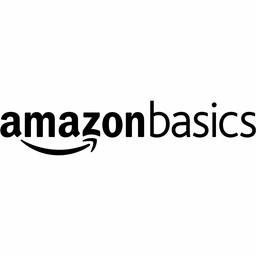

In [26]:
import pandas as pd
import os
from IPython.display import Image, display # For displaying images in a notebook

# Define paths
merged_metadata_csv_path = '/kaggle/working/merged_metadata.csv'
image_source_base_dir = '/kaggle/working/images/small' # Base directory for image paths

# --- Step 1: Load the merged metadata CSV ---
print(f"Loading merged metadata from {merged_metadata_csv_path}...")
try:
    df_merged = pd.read_csv(merged_metadata_csv_path, low_memory=False)
    print(f"Loaded {len(df_merged)} rows from merged metadata CSV.")
except FileNotFoundError:
    print(f"Error: Merged metadata CSV not found at {merged_metadata_csv_path}. Please ensure it was created.")
    df_merged = pd.DataFrame() # Empty DataFrame to prevent further processing
except Exception as e:
    print(f"An error occurred while loading the merged metadata CSV: {e}")
    df_merged = pd.DataFrame()


if not df_merged.empty:
    # --- Step 2: Find a main_image_id with multiple occurrences ---
    # Count how many times each main_image_id appears
    image_id_counts = df_merged['main_image_id'].value_counts()

    # Find image IDs that appear more than once
    multiple_occurrence_ids = image_id_counts[image_id_counts > 1].index.tolist()

    print(f"\nFound {len(multiple_occurrence_ids)} unique main_image_ids associated with multiple listing entries.")

    if multiple_occurrence_ids:
        # --- Step 3: Select one example image ID ---
        example_image_id = multiple_occurrence_ids[0] # Take the first one as an example
        print(f"\nUsing example main_image_id: {example_image_id}")

        # --- Step 4: Get all rows for this example image ID ---
        example_rows_df = df_merged[df_merged['main_image_id'] == example_image_id].copy()

        print(f"\nFound {len(example_rows_df)} listing entries associated with image ID {example_image_id}.")

        # --- Step 5: Display the metadata rows ---
        print("\nMetadata rows for this image ID:")
        # Use to_string to ensure all columns are displayed for the example rows
        print(example_rows_df.to_string())

        # --- Step 6: Get the image path and display the image ---
        # The path should be the same for all rows with this image_id, so take the first one
        relative_image_path = example_rows_df['path'].iloc[0]
        full_image_path = os.path.join(image_source_base_dir, relative_image_path)

        print(f"\nAttempting to display image from path: {full_image_path}")

        if os.path.exists(full_image_path):
            try:
                # Display the image in the notebook output
                display(Image(filename=full_image_path))
            except Exception as e:
                print(f"Error displaying image: {e}")
                print("Could not display the image. Ensure you are in a notebook environment like Kaggle or Jupyter.")
        else:
            print(f"Error: Image file not found at path: {full_image_path}")

    else:
        print("\nNo main_image_ids found with multiple listing entries in the merged data.")

else:
    print("\nSkipping example display as the merged metadata DataFrame was not loaded.")



In [27]:
example_rows_df

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,item_id,main_image_id,country,marketplace,domain_name,brand_en,bullet_point_en,color_en,fabric_type_en,item_name_en,model_name_en,style_en,model_number,product_type,node_id,node_name,image_id,height,width,path
149,B0849DMNS9,61OnkGVhMWL,IT,Amazon,amazon.it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,OS-LOIE-1FG,SAFETY_SUPPLY,5.866069e+09,/Categorie,61OnkGVhMWL,1500,1500,35/3595924e.jpg
834,B08511TB6H,61OnkGVhMWL,CA,Amazon,amazon.ca,AmazonCommercial,NaN,NaN,NaN,Amazon Commercial Pure Sinewave UPS Battery Ba...,NaN,"1500VA, 1100W",ACMT1500,POWER_SUPPLIES_OR_PROTECTION,3.341402e+09,/Categories/Computers & Accessories/Accessorie...,61OnkGVhMWL,1500,1500,35/3595924e.jpg
958,B088XJ85XT,61OnkGVhMWL,US,Amazon,amazon.com,AmazonBasics,Fast pick-up: adhesive side of paper removes l...,NaN,NaN,"AmazonBasics Lint Roller Refills, 60-Sheet, 4-...",NaN,"60-Sheet, 4-Pack Refills",13017-LR4,HOME,1.534296e+07,/Products/Household Supplies/Laundry/Lint Remo...,61OnkGVhMWL,1500,1500,35/3595924e.jpg
1045,B07PHPQTCJ,61OnkGVhMWL,CA,Amazon,amazon.ca,AmazonBasics,NaN,Polished Brass,NaN,"AmazonBasics Door Latch, Polished Brass, 1-Pack",NaN,Door Latch,AB-DH301-PB,HOME,NaN,NaN,61OnkGVhMWL,1500,1500,35/3595924e.jpg
1209,B01MRLUC1P,61OnkGVhMWL,DE,Amazon,amazon.de,NaN,Outer dimensions:,NaN,NaN,Amazon Household Small Moving Box Pack of 25,NaN,NaN,7578/0029,OFFICE_PRODUCTS,2.029840e+08,/Kategorien/Umschläge & Versandzubehör/Versand...,61OnkGVhMWL,1500,1500,35/3595924e.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146545,B07YB3C3QB,61OnkGVhMWL,US,Amazon,amazon.com,AmazonBasics,NaN,NaN,NaN,"AmazonBasics Coil Binding Spine,3/8 inch,100-p...",NaN,NaN,CBS3（Coil）,OFFICE_PRODUCTS,1.069558e+06,/Categories/Office & School Supplies/Binders &...,61OnkGVhMWL,1500,1500,35/3595924e.jpg
146644,B086H6ZVWZ,61OnkGVhMWL,US,Amazon,amazon.com,AmazonCommercial,"Single-use, disposable, heavy-duty vinyl glove...",NaN,NaN,AmazonCommercial Heavy Duty Powder Free Dispos...,NaN,Heavy Duty - Blue,VG-031,FOOD_SERVICE_SUPPLY,1.534290e+07,/Products/Household Supplies/Cleaning Tools/Gl...,61OnkGVhMWL,1500,1500,35/3595924e.jpg
146654,B085LJXD5V,61OnkGVhMWL,US,Amazon,amazon.com,AmazonBasics,"Sticky-back, clear, glossy full page labels fo...",Glossy Clear,NaN,AmazonBasics Astrobrights Glossy Crystal Clear...,NaN,"8-1/2""x11""",AB-GCFS005,OFFICE_PRODUCTS,1.069410e+06,"/Categories/Office & School Supplies/Labels, I...",61OnkGVhMWL,1500,1500,35/3595924e.jpg
146935,B08D9PWLVC,61OnkGVhMWL,NL,Amazon,amazon.nl,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F1-AZ,BISS,1.624229e+10,/Categorieën,61OnkGVhMWL,1500,1500,35/3595924e.jpg


In [28]:
import pandas as pd
import os

# Define the path to the merged metadata CSV
merged_metadata_csv_path = '/kaggle/working/merged_metadata.csv'

# --- Step 1: Load the merged metadata CSV ---
print(f"Loading merged metadata from {merged_metadata_csv_path}...")
try:
    df_merged = pd.read_csv(merged_metadata_csv_path, low_memory=False)
    print(f"Loaded {len(df_merged)} rows from merged metadata CSV.")
except FileNotFoundError:
    print(f"Error: Merged metadata CSV not found at {merged_metadata_csv_path}. Please ensure it was created.")
    df_merged = pd.DataFrame() # Empty DataFrame to prevent further processing
except Exception as e:
    print(f"An error occurred while loading the merged metadata CSV: {e}")
    df_merged = pd.DataFrame()


if not df_merged.empty:
    # --- Step 2: Count occurrences of each main_image_id ---
    print("\nCounting occurrences of each main_image_id...")
    image_id_counts = df_merged['main_image_id'].value_counts()

    # --- Step 3: Identify images with more than 1 entry ---
    # These are the main_image_ids where the count is > 1
    image_ids_with_multiple_entries = image_id_counts[image_id_counts > 1].index.tolist()

    # The number of such unique image IDs
    num_images_with_multiple_entries = len(image_ids_with_multiple_entries)
    print(f"\nNumber of unique images (main_image_ids) with more than 1 listing entry: {num_images_with_multiple_entries}")

    # --- Step 4: Calculate rows remaining if multiple entry images are removed ---
    # This means keeping only the rows where the main_image_id appears exactly once.
    # First, get the image_ids that appear exactly once
    image_ids_with_single_entry = image_id_counts[image_id_counts == 1].index.tolist()

    # Filter the DataFrame to keep only rows with these single-entry image_ids
    df_single_entry = df_merged[df_merged['main_image_id'].isin(image_ids_with_single_entry)].copy()

    # The number of rows remaining is the length of this filtered DataFrame
    rows_remaining_if_removed = len(df_single_entry)

    print(f"\nNumber of rows that would remain if all entries for images with multiple listings were removed: {rows_remaining_if_removed}")

    # Optional: Verify the number of rows removed
    total_rows = len(df_merged)
    rows_removed = total_rows - rows_remaining_if_removed
    print(f"Total rows in original merged data: {total_rows}")
    print(f"Number of rows removed (associated with images having multiple listings): {rows_removed}")

else:
    print("\nSkipping analysis as the merged metadata DataFrame was not loaded.")



Loading merged metadata from /kaggle/working/merged_metadata.csv...
Loaded 147127 rows from merged metadata CSV.

Counting occurrences of each main_image_id...

Number of unique images (main_image_ids) with more than 1 listing entry: 11244

Number of rows that would remain if all entries for images with multiple listings were removed: 112267
Total rows in original merged data: 147127
Number of rows removed (associated with images having multiple listings): 34860


In [29]:
import pandas as pd
import os
import shutil # For deleting files
from tqdm.notebook import tqdm # For progress bars

# Define paths
merged_metadata_csv_path = '/kaggle/working/merged_metadata.csv' # Input merged CSV
output_single_entry_metadata_csv_path = '/kaggle/working/metadata/single_entry_metadata.csv' # Output filtered CSV (single entry per image)
images_directory_to_clean = '/kaggle/working/common_with_metadata' # Directory containing images to potentially delete

# --- Step 1: Load the merged metadata CSV ---
print(f"Loading merged metadata from {merged_metadata_csv_path}...")
try:
    df_merged = pd.read_csv(merged_metadata_csv_path, low_memory=False)
    print(f"Loaded {len(df_merged)} rows from merged metadata CSV.")
except FileNotFoundError:
    print(f"Error: Merged metadata CSV not found at {merged_metadata_csv_path}. Please ensure it was created.")
    df_merged = pd.DataFrame() # Empty DataFrame to prevent further processing
except Exception as e:
    print(f"An error occurred while loading the merged metadata CSV: {e}")
    df_merged = pd.DataFrame()


if not df_merged.empty:
    # --- Step 2: Count occurrences of each main_image_id ---
    print("\nCounting occurrences of each main_image_id...")
    image_id_counts = df_merged['main_image_id'].value_counts()

    # --- Step 3: Identify image IDs with single vs. multiple entries ---
    image_ids_with_single_entry = image_id_counts[image_id_counts == 1].index.tolist()
    image_ids_with_multiple_entries = image_id_counts[image_id_counts > 1].index.tolist()

    print(f"Identified {len(image_ids_with_single_entry)} unique image IDs with a single listing entry.")
    print(f"Identified {len(image_ids_with_multiple_entries)} unique image IDs with multiple listing entries.")

    # --- Step 4: Filter the DataFrame to keep only single-entry rows ---
    print("\nFiltering DataFrame to keep only rows for images with a single listing entry...")
    df_single_entry = df_merged[df_merged['main_image_id'].isin(image_ids_with_single_entry)].copy() # Use .copy() to avoid SettingWithCopyWarning

    print(f"Filtered DataFrame (single entry per image) contains {len(df_single_entry)} rows.")

    # --- Step 5: Save the filtered DataFrame to a new CSV ---
    print(f"\nSaving filtered metadata (single entry per image) to {output_single_entry_metadata_csv_path}...")
    try:
        # Ensure the directory for the output file exists
        output_dir = os.path.dirname(output_single_entry_metadata_csv_path)
        if output_dir and not os.path.exists(output_dir):
            os.makedirs(output_dir, exist_ok=True)

        df_single_entry.to_csv(output_single_entry_metadata_csv_path, index=False) # index=False prevents writing the DataFrame index

        print("Filtered metadata CSV created successfully.")
        print(f"Saved to: {output_single_entry_metadata_csv_path}")

    except Exception as e:
        print(f"An error occurred while saving the filtered CSV: {e}")

    # --- Step 6: Identify image paths to delete ---
    print("\nIdentifying image paths to delete...")
    # Get the rows corresponding to images with multiple entries
    df_to_delete = df_merged[df_merged['main_image_id'].isin(image_ids_with_multiple_entries)].copy()

    # Get the unique paths from these rows
    # The 'path' column contains the relative path from the original images/small directory.
    # We need the filename part to find it in the common_with_listings_metadata folder.
    relative_paths_to_delete = df_to_delete['path'].unique().tolist()

    # Construct the full file paths in the target directory
    full_paths_to_delete = [os.path.join(images_directory_to_clean, os.path.basename(p)) for p in relative_paths_to_delete]

    print(f"Identified {len(full_paths_to_delete)} unique image files to delete from {images_directory_to_clean}.")

    # --- Step 7: Delete the identified image files ---
    print(f"\nDeleting image files from {images_directory_to_clean}...")
    deleted_count = 0
    not_found_count = 0

    for file_path in tqdm(full_paths_to_delete, desc="Deleting Images"):
        if os.path.exists(file_path):
            try:
                os.remove(file_path)
                # print(f"Deleted: {os.path.basename(file_path)}") # Uncomment for verbose output
                deleted_count += 1
            except OSError as e:
                print(f"Error deleting {os.path.basename(file_path)}: {e}")
            except Exception as e:
                print(f"An unexpected error occurred deleting {os.path.basename(file_path)}: {e}")
        else:
            not_found_count += 1
            # print(f"Warning: File not found for deletion: {os.path.basename(file_path)}") # Uncomment for warnings

    print(f"\nFinished deletion.")
    print(f"Successfully deleted {deleted_count} image files.")
    print(f"Skipped {not_found_count} files (not found in the directory).")

else:
    print("\nSkipping filtering and deletion as the merged metadata DataFrame was not loaded.")



Loading merged metadata from /kaggle/working/merged_metadata.csv...
Loaded 147127 rows from merged metadata CSV.

Counting occurrences of each main_image_id...
Identified 112267 unique image IDs with a single listing entry.
Identified 11244 unique image IDs with multiple listing entries.

Filtering DataFrame to keep only rows for images with a single listing entry...
Filtered DataFrame (single entry per image) contains 112267 rows.

Saving filtered metadata (single entry per image) to /kaggle/working/metadata/single_entry_metadata.csv...
Filtered metadata CSV created successfully.
Saved to: /kaggle/working/metadata/single_entry_metadata.csv

Identifying image paths to delete...
Identified 11244 unique image files to delete from /kaggle/working/common_with_metadata.

Deleting image files from /kaggle/working/common_with_metadata...


Deleting Images:   0%|          | 0/11244 [00:00<?, ?it/s]


Finished deletion.
Successfully deleted 11244 image files.
Skipped 0 files (not found in the directory).


In [30]:
!ls -lha "/kaggle/working"

total 3.2G
drwxr-xr-x 6 root    root  4.0K May  3 14:35 .
drwxr-xr-x 8 root    root  4.0K May  3 14:28 ..
-rw-r--r-- 1 root    root  3.1G Jul 17  2023 abo-images-small.tar
-rw-r--r-- 1 root    root   84M Jul 17  2023 abo-listings.tar
drwxr-xr-x 2 root    root  3.7M May  3 14:35 common_with_metadata
drwxr-xr-x 4 1808267 users 4.0K Jul 17  2023 images
-rw-r--r-- 1 1808267 users  15K Jun 26  2023 LICENSE-CC-BY-4.0.txt
drwxr-xr-x 3 1808267 users 4.0K Jul 17  2023 listings
-rw-r--r-- 1 root    root   53M May  3 14:34 merged_metadata.csv
drwxr-xr-x 2 root    root  4.0K May  3 14:35 metadata
---------- 1 root    root  996K May  3 14:35 __notebook__.ipynb


In [31]:
import os
from PIL import Image
import pandas as pd
from tqdm.notebook import tqdm
import humanize # To format file sizes nicely (install if needed: !pip install humanize)

# Define the path to the folder containing the filtered images
image_folder_path = '/kaggle/working/common_with_metadata'

# --- Step 1: List and filter image files ---
print(f"Scanning folder: {image_folder_path}...")
all_files = os.listdir(image_folder_path)

# Filter for common image file extensions
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.webp')
image_files = [f for f in all_files if f.lower().endswith(image_extensions) and os.path.isfile(os.path.join(image_folder_path, f))]

num_images = len(image_files)
print(f"Found {num_images} potential image files.")

if num_images == 0:
    print("No image files found in the folder to analyze.")
else:
    # --- Step 2: Collect details for each image ---
    print("\nCollecting image details (dimensions, file size)...")
    image_details = []
    total_folder_size_bytes = 0
    formats_found = set()
    unreadable_count = 0

    for image_filename in tqdm(image_files, desc="Analyzing Images"):
        image_path = os.path.join(image_folder_path, image_filename)

        # Get file size
        try:
            file_size_bytes = os.path.getsize(image_path)
            total_folder_size_bytes += file_size_bytes
        except Exception as e:
            # print(f"Could not get size for {image_filename}: {e}") # Uncomment for debug
            file_size_bytes = 0 # Assign 0 if size can't be obtained

        # Get image dimensions and format using Pillow
        dimensions = (None, None) # Default if unreadable
        img_format = None
        try:
            with Image.open(image_path) as img:
                img.verify() # Verify file integrity
                img = Image.open(image_path) # Re-open after verify
                img.load() # Load image data

                dimensions = img.size # (width, height)
                img_format = img.format
                formats_found.add(img_format)

        except Exception as e:
            unreadable_count += 1
            # print(f"Could not read dimensions/format for {image_filename}: {e}") # Uncomment for debug


        image_details.append({
            'filename': image_filename,
            'width': dimensions[0],
            'height': dimensions[1],
            'format': img_format,
            'size_bytes': file_size_bytes
        })

    print("\nAnalysis complete.")
    if unreadable_count > 0:
        print(f"Warning: Could not read dimensions/format for {unreadable_count} files.")

    # --- Step 3: Summarize the collected details ---
    df_details = pd.DataFrame(image_details)

    print("\n--- Summary Statistics ---")

    # Total number of images (should match num_images)
    print(f"Total Images Count: {len(df_details)}")

    # Total folder size
    # Use humanize to make the size readable (e.g., 1.5 GB)
    try:
        print(f"Total Folder Size on Disk: {humanize.naturalsize(total_folder_size_bytes)}")
    except NameError:
         print(f"Total Folder Size (bytes): {total_folder_size_bytes}")
         print("Install 'humanize' library for better size formatting: !pip install humanize")


    # Image Dimensions Summary
    print("\nImage Dimensions (Width x Height):")
    # Filter out rows where dimensions couldn't be read
    df_readable_dims = df_details.dropna(subset=['width', 'height'])
    if not df_readable_dims.empty:
        avg_width = df_readable_dims['width'].mean()
        avg_height = df_readable_dims['height'].mean()
        min_width = df_readable_dims['width'].min()
        max_width = df_readable_dims['width'].max()
        min_height = df_readable_dims['height'].min()
        max_height = df_readable_dims['height'].max()

        print(f"  Average: {avg_width:.0f} x {avg_height:.0f}")
        print(f"  Min: {min_width:.0f} x {min_height:.0f}")
        print(f"  Max: {max_width:.0f} x {max_height:.0f}")
    else:
        print("  No readable image dimensions found.")


    # File Size Summary
    print("\nImage File Sizes:")
    # Filter out rows where size couldn't be read (size_bytes=0)
    df_readable_sizes = df_details[df_details['size_bytes'] > 0]
    if not df_readable_sizes.empty:
        avg_size = df_readable_sizes['size_bytes'].mean()
        min_size = df_readable_sizes['size_bytes'].min()
        max_size = df_readable_sizes['size_bytes'].max()

        try:
            print(f"  Average: {humanize.naturalsize(avg_size)}")
            print(f"  Min: {humanize.naturalsize(min_size)}")
            print(f"  Max: {humanize.naturalsize(max_size)}")
        except NameError:
            print(f"  Average (bytes): {avg_size:.0f}")
            print(f"  Min (bytes): {min_size:.0f}")
            print(f"  Max (bytes): {max_size:.0f}")

    else:
        print("  No readable file sizes found.")


    # Image Formats Summary
    print("\nImage Formats Found:")
    if formats_found:
        print(f"  {', '.join(list(formats_found))}")
    else:
        print("  No readable image formats found.")

    # Optional: Display info about the details DataFrame
    # print("\nDetails DataFrame Info:")
    # df_details.info()

    # Optional: Display first few rows of the details DataFrame
    # print("\nFirst 5 rows of Image Details:")
    # print(df_details.head().to_string())


Scanning folder: /kaggle/working/common_with_metadata...
Found 112267 potential image files.



Analyzing Images:   0%|          | 0/112267 [00:00<?, ?it/s]


Analysis complete.

--- Summary Statistics ---
Total Images Count: 112267
Total Folder Size on Disk: 765.2 MB

Image Dimensions (Width x Height):
  Average: 222 x 246
  Min: 20 x 26
  Max: 256 x 256

Image File Sizes:
  Average: 6.8 kB
  Min: 559 Bytes
  Max: 51.7 kB

Image Formats Found:
  JPEG, PNG


In [32]:
# # import os
# # import shutil

# # --- Configuration ---
# # Specify the path to the folder you want to download
# # Replace 'your_folder_name' with the actual name of the folder inside /kaggle/working
# # folder_to_archive = '/kaggle/working//kaggle/working/common_with_metadata'

# # Specify the name for the output zip file (will be created in /kaggle/working)
# # output_zip_name = 'vr_images_filtered' # Name without .zip extension

# # # --- Create the Archive ---
# # print(f"Checking if folder exists: {folder_to_archive}")
# # if os.path.exists(folder_to_archive):
# #     print(f"Creating zip archive for folder: {folder_to_archive}...")
# #     try:
# #         # shutil.make_archive(base_name, format, root_dir, base_dir)
# #         # base_name: The name of the archive file, without the extension.
# #         # format: The archive format ('zip', 'tar', 'gztar', 'bztar', 'xztar').
# #         # root_dir: Directory to start archiving from (usually /kaggle/working).
# #         # base_dir: Directory inside root_dir to archive (the folder_to_archive relative to root_dir).
# #         archive_path = shutil.make_archive(
#             # base_name=os.path.join('/kaggle/working', output_zip_name),
# #             format='zip',
# #             root_dir='/kaggle/working',
# #             base_dir=os.path.basename(folder_to_archive) # Archive the folder itself, not its parent
# #         )
# #         print(f"Archive created successfully at: {archive_path}")

# #         # --- How to Download ---
# #         print("\n--- How to Download the Archive ---")
# #         print("1. Run this code cell.")
# #         print("2. Once execution is complete, look at the 'Output' section of this notebook.")
# #         print(f"3. You should see the file '{os.path.basename(archive_path)}' listed there.")
# #         print("4. Click on the file name or the download icon next to it to download it to your local machine.")
# #         print("\nAlternatively, you might be able to use the Kaggle notebook's file browser (usually on the right or left side) to navigate to /kaggle/working and download the .zip file directly.")


# #     except Exception as e:
# #         print(f"Error creating archive: {e}")
# # else:
# #     print(f"Error: Folder not found at {folder_to_archive}. Please check the path.")

# # ```python
# # Example usage with your specific folder:
# # Replace 'your_folder_name' with 'images/common_with_listings_metadata'
# folder_to_archive_specific = '/kaggle/working/common_with_metadata'
# output_zip_name_specific = 'vr_images_filtered'

# print(f"Checking if folder exists: {folder_to_archive_specific}")
# if os.path.exists(folder_to_archive_specific):
#     print(f"Creating zip archive for folder: {folder_to_archive_specific}...")
#     try:
#         archive_path_specific = shutil.make_archive(
#             base_name=os.path.join('/kaggle/working', output_zip_name_specific),
#             format='zip',
#             root_dir='/kaggle/working',
#             base_dir=os.path.basename(folder_to_archive_specific)
#         )
#         print(f"Archive created successfully at: {archive_path_specific}")

#         print("\n--- How to Download the Archive ---")
#         print("1. Run this code cell.")
#         print("2. Once execution is complete, look at the 'Output' section of this notebook.")
#         print(f"3. You should see the file '{os.path.basename(archive_path_specific)}' listed there.")
#         print("4. Click on the file name or the download icon next to it to download it to your local machine.")
#         print("\nAlternatively, use the Kaggle notebook's file browser to navigate to /kaggle/working and download the .zip file.")

#     except Exception as e:
#         print(f"Error creating archive: {e}")
# else:
#     print(f"Error: Folder not found at {folder_to_archive_specific}. Please check the path.")



In [33]:
import pandas as pd
import os
import shutil
from tqdm import tqdm

# Paths
metadata_path = "/kaggle/working/metadata/single_entry_metadata.csv"
image_src_base = "/kaggle/working/images/small"
output_base_dir = "/kaggle/working/categorized_data"

# Load metadata
df = pd.read_csv(metadata_path)

# Ensure output base directory exists
os.makedirs(output_base_dir, exist_ok=True)

# Step 1: Create CSVs and folders for each category
category_csv_paths = {}
for product_type, df_cat in df.groupby("product_type"):
    # Sanitize category name
    safe_product_type = product_type.replace("/", "_").replace(" ", "_")

    # Create category folder
    category_folder = os.path.join(output_base_dir, safe_product_type)
    os.makedirs(category_folder, exist_ok=True)

    # Save category-specific CSV
    csv_path = os.path.join(category_folder, f"{safe_product_type}.csv")
    df_cat.to_csv(csv_path, index=False)
    category_csv_paths[product_type] = (csv_path, category_folder)

# Step 2: Copy images using 'path' column
for product_type, (csv_path, category_folder) in tqdm(category_csv_paths.items(), desc="Copying images per category"):
    df_cat = pd.read_csv(csv_path)
    copied_count = 0

    for _, row in df_cat.iterrows():
        image_rel_path = row['path'].lstrip("/")  # remove leading slash if present
        src_path = os.path.join(image_src_base, image_rel_path)
        dst_path = os.path.join(category_folder, os.path.basename(image_rel_path))

        if os.path.exists(src_path):
            shutil.copyfile(src_path, dst_path)
            copied_count += 1
        else:
            print(f"⚠️ Missing image: {src_path}")

    print(f"✅ {copied_count} images copied for category: {product_type}")


Copying images per category:   0%|          | 0/555 [00:00<?, ?it/s]

✅ 37 images copied for category: ABIS_BEAUTY
✅ 3 images copied for category: ABIS_BOOK
✅ 123 images copied for category: ABIS_DRUGSTORE
✅ 13 images copied for category: ABIS_ELECTRONICS
✅ 12 images copied for category: ABIS_HOME_IMPROVEMENT
✅ 22 images copied for category: ABIS_KITCHEN
✅ 60 images copied for category: ABIS_LAWN_AND_GARDEN
✅ 5 images copied for category: ABIS_PET_PRODUCTS
✅ 2 images copied for category: ABIS_VIDEO_GAMES


Copying images per category:   5%|▌         | 28/555 [00:00<00:06, 77.45it/s]

✅ 755 images copied for category: ACCESSORY
✅ 121 images copied for category: ACCESSORY_OR_PART_OR_SUPPLY
✅ 1 images copied for category: AGRICULTURAL_SUPPLIES
✅ 2 images copied for category: AIR_COMPRESSOR
✅ 20 images copied for category: AIR_CONDITIONER
✅ 2 images copied for category: AIR_FRYER
✅ 3 images copied for category: AIR_MATTRESS
✅ 2 images copied for category: AIR_PUMP
✅ 1 images copied for category: AIR_PURIFIER
✅ 1 images copied for category: AMAZON_BOOK_READER_ACCESSORY
✅ 3 images copied for category: AMAZON_TABLET_ACCESSORY
✅ 6 images copied for category: ANIMAL_LITTER
✅ 15 images copied for category: ANTENNA
✅ 37 images copied for category: AREA_DEODORIZER
✅ 3 images copied for category: ARTIFICIAL_TREE
✅ 9 images copied for category: ART_AND_CRAFT_SUPPLY
✅ 8 images copied for category: ASTRINGENT_SUBSTANCE
✅ 2 images copied for category: AUDIO_OR_VIDEO
✅ 236 images copied for category: AUTO_ACCESSORY
✅ 6 images copied for category: AUTO_CHEMICAL
✅ 31 images copied for

Copying images per category:   7%|▋         | 38/555 [00:00<00:06, 75.88it/s]

✅ 201 images copied for category: BABY_PRODUCT
✅ 216 images copied for category: BACKPACK
✅ 2 images copied for category: BADGE_HOLDER
✅ 14 images copied for category: BAG
✅ 1 images copied for category: BAKEWARE
✅ 5 images copied for category: BAKING_CUP
✅ 6 images copied for category: BAKING_MIX
✅ 25 images copied for category: BAKING_PAN
✅ 1 images copied for category: BAKING_PAPER
✅ 7 images copied for category: BARBECUE_GRILL
✅ 7 images copied for category: BARBELL
✅ 79 images copied for category: BASKET
✅ 15 images copied for category: BATHWATER_ADDITIVE
✅ 181 images copied for category: BATTERY
✅ 36 images copied for category: BEAN_BAG_CHAIR


Copying images per category:  11%|█         | 61/555 [00:00<00:06, 80.89it/s]

✅ 320 images copied for category: BEAUTY
✅ 64 images copied for category: BED
✅ 55 images copied for category: BED_FRAME
✅ 87 images copied for category: BENCH
✅ 6 images copied for category: BINOCULAR
✅ 128 images copied for category: BISS
✅ 1 images copied for category: BLANKET
✅ 15 images copied for category: BLANK_MEDIA
✅ 1 images copied for category: BLOOD_PRESSURE_MONITOR
✅ 8 images copied for category: BODY_DEODORANT
✅ 4 images copied for category: BODY_LUBRICANT
✅ 46 images copied for category: BODY_POSITIONER
✅ 7 images copied for category: BOOKEND
✅ 125 images copied for category: BOOT
✅ 54 images copied for category: BOTTLE
✅ 3 images copied for category: BOTTLE_OPENER
✅ 16 images copied for category: BOTTLE_RACK
✅ 2 images copied for category: BOXING_GLOVE
✅ 115 images copied for category: BRACELET


Copying images per category:  15%|█▍        | 82/555 [00:01<00:05, 89.98it/s]

✅ 94 images copied for category: BREAD
✅ 4 images copied for category: BREAD_MAKING_MACHINE
✅ 27 images copied for category: BREAKFAST_CEREAL
✅ 16 images copied for category: BROOM
✅ 19 images copied for category: BUCKET
✅ 9 images copied for category: BUILDING_MATERIAL
✅ 216 images copied for category: CABINET
✅ 5 images copied for category: CADDY
✅ 31 images copied for category: CAKE
✅ 3 images copied for category: CALCULATOR
✅ 7 images copied for category: CAMCORDER
✅ 30 images copied for category: CAMERA_BAGS_AND_CASES
✅ 3 images copied for category: CAMERA_FLASH
✅ 20 images copied for category: CAMERA_LENS_FILTERS
✅ 38 images copied for category: CAMERA_OTHER_ACCESSORIES
✅ 7 images copied for category: CAMERA_SUPPORT
✅ 29 images copied for category: CAMERA_TRIPOD
✅ 32 images copied for category: CANDLE
✅ 12 images copied for category: CANDLE_HOLDER
✅ 10 images copied for category: CANDY
✅ 8 images copied for category: CAN_OPENER
✅ 13 images copied for category: CARD_STOCK
✅ 53 ima

Copying images per category:  17%|█▋        | 97/555 [00:15<02:51,  2.67it/s]

✅ 63996 images copied for category: CELLULAR_PHONE_CASE
✅ 28 images copied for category: CE_ACCESSORY
✅ 16 images copied for category: CE_CARRYING_CASE_OR_BAG


Copying images per category:  19%|█▉        | 108/555 [00:15<01:55,  3.87it/s]

✅ 1717 images copied for category: CHAIR
✅ 5 images copied for category: CHANGING_PAD_COVER
✅ 130 images copied for category: CHARGING_ADAPTER
✅ 10 images copied for category: CHARM
✅ 6 images copied for category: CHILDRENS_COSTUME
✅ 20 images copied for category: CHOCOLATE_CANDY
✅ 103 images copied for category: CLEANING_AGENT
✅ 30 images copied for category: CLEANING_BRUSH
✅ 123 images copied for category: CLOCK
✅ 101 images copied for category: CLOTHES_HANGER
✅ 68 images copied for category: CLOTHES_RACK
✅ 152 images copied for category: COFFEE
✅ 19 images copied for category: COFFEE_MAKER
✅ 9 images copied for category: COMPUTER


Copying images per category:  24%|██▍       | 135/555 [00:16<00:41, 10.04it/s]

✅ 151 images copied for category: COMPUTER_ADD_ON
✅ 98 images copied for category: COMPUTER_COMPONENT
✅ 1 images copied for category: COMPUTER_COOLING_DEVICE
✅ 31 images copied for category: COMPUTER_DRIVE_OR_STORAGE
✅ 14 images copied for category: COMPUTER_INPUT_DEVICE
✅ 2 images copied for category: COMPUTER_INPUT_DEVICE_ACCESSORY
✅ 2 images copied for category: COMPUTER_SPEAKER
✅ 1 images copied for category: CONDIMENT
✅ 30 images copied for category: CONDITIONER
✅ 23 images copied for category: CONSUMER_ELECTRONICS
✅ 46 images copied for category: COOKIE
✅ 2 images copied for category: COOKIE_CUTTER
✅ 1 images copied for category: COOKING_OVEN
✅ 35 images copied for category: COSMETIC_BRUSH
✅ 61 images copied for category: COSMETIC_CASE
✅ 1 images copied for category: COSMETIC_POWDER
✅ 3 images copied for category: COUNTERTOP_BURNER
✅ 6 images copied for category: COUNTERTOP_GRIDDLE_APPLIANCE
✅ 5 images copied for category: COUNTERTOP_OVEN
✅ 16 images copied for category: CRACKER


Copying images per category:  28%|██▊       | 157/555 [00:16<00:22, 17.79it/s]

✅ 162 images copied for category: DESK
✅ 4 images copied for category: DIETARY_SUPPLEMENTS
✅ 1 images copied for category: DIGITAL_DEVICE_3
✅ 1 images copied for category: DINNERWARE
✅ 26 images copied for category: DISHWARE_BOWL
✅ 69 images copied for category: DISHWARE_PLACE_SETTING
✅ 29 images copied for category: DISHWARE_PLATE
✅ 2 images copied for category: DISHWASHER
✅ 16 images copied for category: DISHWASHER_DETERGENT
✅ 18 images copied for category: DOORSTOP
✅ 92 images copied for category: DRESSER
✅ 1 images copied for category: DRILL
✅ 25 images copied for category: DRILL_BITS
✅ 257 images copied for category: DRINKING_CUP
✅ 1 images copied for category: DRINKING_STRAW
✅ 4 images copied for category: DRINK_COASTER
✅ 26 images copied for category: DRINK_FLAVORED
✅ 54 images copied for category: DRYING_RACK
✅ 61 images copied for category: DUTCH_OVENS
✅ 34 images copied for category: EARMUFF
✅ 3 images copied for category: EARPLUG


Copying images per category:  32%|███▏      | 180/555 [00:16<00:12, 29.73it/s]

✅ 613 images copied for category: EARRING
✅ 51 images copied for category: EDIBLE_OIL_VEGETABLE
✅ 9 images copied for category: EDUCATIONAL_SUPPLIES
✅ 77 images copied for category: ELECTRIC_FAN
✅ 19 images copied for category: ELECTRIC_WATER_BOILER
✅ 12 images copied for category: ELECTROMECHANICAL_GAUGE
✅ 110 images copied for category: ELECTRONIC_ADAPTER
✅ 7 images copied for category: ELECTRONIC_CABLE
✅ 1 images copied for category: ELECTRONIC_DEVICE_DOCKING_STATION
✅ 3 images copied for category: ELECTRONIC_SWITCH
✅ 49 images copied for category: ENVELOPE
✅ 9 images copied for category: ESSENTIAL_OIL
✅ 21 images copied for category: EXERCISE_BAND
✅ 64 images copied for category: EXERCISE_MAT
✅ 4 images copied for category: EYEBROW_COLOR
✅ 16 images copied for category: EYELID_COLOR
✅ 44 images copied for category: EYEWEAR
✅ 6 images copied for category: FACE_SHAPING_MAKEUP
✅ 32 images copied for category: FACIAL_TISSUE
✅ 31 images copied for category: FASHIONEARRING
✅ 40 images co

Copying images per category:  34%|███▍      | 191/555 [00:17<00:11, 31.54it/s]

✅ 915 images copied for category: FINEEARRING


Copying images per category:  36%|███▌      | 199/555 [00:17<00:12, 28.37it/s]

✅ 1120 images copied for category: FINENECKLACEBRACELETANKLET
✅ 99 images copied for category: FINEOTHER
✅ 453 images copied for category: FINERING
✅ 11 images copied for category: FIRST_AID_KIT
✅ 9 images copied for category: FISH
✅ 5 images copied for category: FISHING_EQUIPMENT
✅ 5 images copied for category: FITNESS_BENCH
✅ 5 images copied for category: FLASH_DRIVE
✅ 23 images copied for category: FLASH_MEMORY
✅ 76 images copied for category: FLATWARE


Copying images per category:  39%|███▉      | 216/555 [00:17<00:08, 40.58it/s]

✅ 136 images copied for category: FLAT_SCREEN_DISPLAY_MOUNT
✅ 93 images copied for category: FLAT_SHEET
✅ 1 images copied for category: FLAVORED_DRINK_CONCENTRATE
✅ 9 images copied for category: FLOUR
✅ 33 images copied for category: FOOD_BLENDER
✅ 1 images copied for category: FOOD_DEHYDRATOR
✅ 8 images copied for category: FOOD_MIXER
✅ 7 images copied for category: FOOD_PREPARATION_MOLD
✅ 8 images copied for category: FOOD_PROCESSOR
✅ 271 images copied for category: FOOD_SERVICE_SUPPLY
✅ 15 images copied for category: FOOD_SLICER
✅ 21 images copied for category: FOOD_STORAGE_BAG
✅ 6 images copied for category: FOUNTAIN
✅ 23 images copied for category: FREESTANDING_SHELTER
✅ 50 images copied for category: FRUIT
✅ 16 images copied for category: FRUIT_SNACK
✅ 3 images copied for category: FUEL_PUMP
✅ 86 images copied for category: FURNITURE
✅ 121 images copied for category: FURNITURE_COVER
✅ 6 images copied for category: FURNITURE_LINER
✅ 1 images copied for category: GAME_DICE
✅ 1 imag

Copying images per category:  43%|████▎     | 236/555 [00:18<00:12, 25.65it/s]

✅ 3998 images copied for category: GROCERY
✅ 2 images copied for category: GUITARS
✅ 3 images copied for category: HAIR_BRUSH
✅ 7 images copied for category: HAIR_CLEANER_CONDITIONER
✅ 4 images copied for category: HAIR_COLORING_AGENT
✅ 9 images copied for category: HAIR_COMB
✅ 8 images copied for category: HAIR_REMOVAL_AGENT
✅ 7 images copied for category: HAIR_STYLING_AGENT
✅ 747 images copied for category: HANDBAG
✅ 163 images copied for category: HARDWARE
✅ 1 images copied for category: HARDWARE_CLAMP_VISE
✅ 625 images copied for category: HARDWARE_HANDLE
✅ 10 images copied for category: HARDWARE_HINGE
✅ 8 images copied for category: HARDWARE_TUBING


Copying images per category:  44%|████▎     | 242/555 [00:19<00:12, 24.39it/s]

✅ 352 images copied for category: HAT
✅ 71 images copied for category: HEADBOARD
✅ 118 images copied for category: HEADPHONES


Copying images per category:  45%|████▍     | 247/555 [00:19<00:13, 22.37it/s]

✅ 969 images copied for category: HEALTH_PERSONAL_CARE
✅ 128 images copied for category: HERB
✅ 44 images copied for category: HERBAL_SUPPLEMENT
✅ 2513 images copied for category: HOME
✅ 1325 images copied for category: HOME_BED_AND_BATH


Copying images per category:  48%|████▊     | 265/555 [00:20<00:14, 19.39it/s]

✅ 1436 images copied for category: HOME_FURNITURE_AND_DECOR
✅ 48 images copied for category: HOME_LIGHTING_ACCESSORY
✅ 88 images copied for category: HOME_LIGHTING_AND_LAMPS
✅ 91 images copied for category: HOME_MIRROR
✅ 1 images copied for category: HOME_ORGANIZERS_AND_STORAGE
✅ 10 images copied for category: HONEY
✅ 21 images copied for category: HUMIDIFIER
✅ 5 images copied for category: ICE_CHEST
✅ 2 images copied for category: ICE_CUBE_TRAY
✅ 16 images copied for category: INCENSE
✅ 1 images copied for category: INFANT_TODDLER_CAR_SEAT
✅ 17 images copied for category: INKJET_PRINTER_INK
✅ 21 images copied for category: INK_OR_TONER
✅ 43 images copied for category: INPUT_MOUSE
✅ 10 images copied for category: INPUT_PEN
✅ 149 images copied for category: INSTRUMENT_PARTS_AND_ACCESSORIES


Copying images per category:  49%|████▊     | 270/555 [00:20<00:13, 21.34it/s]

✅ 407 images copied for category: JANITORIAL_SUPPLY
✅ 149 images copied for category: JAR
✅ 2 images copied for category: JERKY
✅ 1 images copied for category: JEWELRY
✅ 25 images copied for category: JEWELRY_SET
✅ 27 images copied for category: JEWELRY_STORAGE
✅ 6 images copied for category: JUICER
✅ 17 images copied for category: JUICE_AND_JUICE_DRINK
✅ 48 images copied for category: KEYBOARDS
✅ 1 images copied for category: KICK_SCOOTER


Copying images per category:  51%|█████     | 283/555 [00:21<00:09, 27.36it/s]

✅ 654 images copied for category: KITCHEN
✅ 21 images copied for category: KITCHEN_KNIFE
✅ 4 images copied for category: KITCHEN_TOOLS
✅ 2 images copied for category: KNIFE_BLOCK_SET
✅ 85 images copied for category: LABEL
✅ 8 images copied for category: LAB_SUPPLY
✅ 13 images copied for category: LADDER
✅ 543 images copied for category: LAMP
✅ 6 images copied for category: LAUNDRY_APPLIANCE
✅ 49 images copied for category: LAUNDRY_DETERGENT
✅ 55 images copied for category: LAUNDRY_HAMPER
✅ 2 images copied for category: LEAVENING_AGENT


Copying images per category:  53%|█████▎    | 292/555 [00:21<00:08, 32.53it/s]

✅ 78 images copied for category: LEGUME
✅ 1 images copied for category: LEHENGA_CHOLI_SET
✅ 9 images copied for category: LEOTARD
✅ 7 images copied for category: LICENSE_PLATE_ATTACHMENT
✅ 540 images copied for category: LIGHT_BULB


Copying images per category:  55%|█████▍    | 305/555 [00:21<00:06, 41.29it/s]

✅ 503 images copied for category: LIGHT_FIXTURE
✅ 14 images copied for category: LIGHT_SOURCE
✅ 1 images copied for category: LIP_BALM
✅ 47 images copied for category: LIP_COLOR
✅ 4 images copied for category: LITTER_BOX
✅ 76 images copied for category: LOCK
✅ 184 images copied for category: LUGGAGE
✅ 89 images copied for category: MAJOR_HOME_APPLIANCES
✅ 3 images copied for category: MANUAL_SHAVING_RAZOR
✅ 30 images copied for category: MARKING_PEN
✅ 5 images copied for category: MASCARA
✅ 5 images copied for category: MASSAGER
✅ 2 images copied for category: MASSAGE_STICK
✅ 1 images copied for category: MATTRESS
✅ 22 images copied for category: MEAL_HOLDER
✅ 15 images copied for category: MEAT
✅ 66 images copied for category: MECHANICAL_COMPONENTS
✅ 1 images copied for category: MECHANICAL_LIGHTER
✅ 2 images copied for category: MEDIA_STORAGE
✅ 92 images copied for category: MEDICATION
✅ 1 images copied for category: MEMORY_READER
✅ 28 images copied for category: MICROPHONE
✅ 8 image

Copying images per category:  59%|█████▉    | 330/555 [00:21<00:03, 65.15it/s]

✅ 7 images copied for category: MICROWAVE_OVEN
✅ 15 images copied for category: MILK_SUBSTITUTE
✅ 25 images copied for category: MINERAL_SUPPLEMENT
✅ 1 images copied for category: MONITOR
✅ 12 images copied for category: MOUSE_PAD
✅ 31 images copied for category: MOUTHWASH
✅ 23 images copied for category: MULTIPORT_HUB
✅ 8 images copied for category: MULTITOOL
✅ 55 images copied for category: MUSCLE_ROLLER
✅ 7 images copied for category: NAIL_POLISH
✅ 431 images copied for category: NECKLACE
✅ 2 images copied for category: NECKTIE
✅ 4 images copied for category: NETWORKING_DEVICE
✅ 1 images copied for category: NETWORKING_ROUTER
✅ 3 images copied for category: NETWORK_INTERFACE_CONTROLLER_ADAPTER
✅ 3 images copied for category: NON_DAIRY_CREAM
✅ 2 images copied for category: NON_RIDING_TOY_VEHICLE
✅ 33 images copied for category: NOODLE
✅ 6 images copied for category: NOTEBOOK_COMPUTER


Copying images per category:  61%|██████    | 338/555 [00:21<00:03, 68.04it/s]

✅ 234 images copied for category: NUTRITIONAL_SUPPLEMENT
✅ 11 images copied for category: NUTS
✅ 20 images copied for category: NUT_BUTTER
✅ 85 images copied for category: OFFICE_ELECTRONICS
✅ 857 images copied for category: OFFICE_PRODUCTS
✅ 27 images copied for category: ORTHOPEDIC_BRACE
✅ 1 images copied for category: OTC_MEDICATION
✅ 330 images copied for category: OTTOMAN
✅ 1 images copied for category: OUTBUILDING
✅ 505 images copied for category: OUTDOOR_LIVING


Copying images per category:  62%|██████▏   | 346/555 [00:22<00:05, 40.81it/s]

✅ 40 images copied for category: OUTDOOR_RECREATION_PRODUCT
✅ 6 images copied for category: PACIFIER
✅ 26 images copied for category: PACKAGED_SOUP_AND_STEW
✅ 86 images copied for category: PANTRY
✅ 60 images copied for category: PAPER_PRODUCT
✅ 12 images copied for category: PAPER_TOWEL_HOLDER
✅ 11 images copied for category: PASTRY
✅ 3 images copied for category: PERCUSSION_INSTRUMENTS
✅ 21 images copied for category: PERSONAL_CARE_APPLIANCE
✅ 20 images copied for category: PERSONAL_COMPUTER
✅ 8 images copied for category: PERSONAL_PILL_DISPENSER
✅ 8 images copied for category: PET_PEST_CONTROL


Copying images per category:  66%|██████▌   | 365/555 [00:22<00:04, 45.77it/s]

✅ 815 images copied for category: PET_SUPPLIES
✅ 3 images copied for category: PET_TOY
✅ 4 images copied for category: PHONE
✅ 40 images copied for category: PHONE_ACCESSORY
✅ 177 images copied for category: PILLOW
✅ 2 images copied for category: PINBOARD
✅ 13 images copied for category: PITCHER
✅ 23 images copied for category: PLACEMAT
✅ 248 images copied for category: PLANTER
✅ 18 images copied for category: PLIERS
✅ 111 images copied for category: PLUMBING_FIXTURE
✅ 13 images copied for category: POPCORN
✅ 21 images copied for category: PORTABLE_AUDIO
✅ 10 images copied for category: PORTABLE_AV_DEVICE


Copying images per category:  70%|██████▉   | 387/555 [00:22<00:02, 68.43it/s]

✅ 310 images copied for category: PORTABLE_ELECTRONIC_DEVICE_COVER
✅ 32 images copied for category: PORTABLE_ELECTRONIC_DEVICE_MOUNT
✅ 46 images copied for category: PORTABLE_ELECTRONIC_DEVICE_STAND
✅ 4 images copied for category: PORTABLE_STOVE
✅ 4 images copied for category: PORTABLE_TOOL_BOX
✅ 11 images copied for category: POT_HOLDER
✅ 23 images copied for category: POULTRY
✅ 1 images copied for category: POWERSPORTS_VEHICLE_PART
✅ 1 images copied for category: POWER_BANK
✅ 5 images copied for category: POWER_CONVERTER
✅ 25 images copied for category: POWER_STRIP
✅ 62 images copied for category: POWER_SUPPLIES_OR_PROTECTION
✅ 7 images copied for category: PRESSURE_COOKER
✅ 8 images copied for category: PRETZEL
✅ 3 images copied for category: PRINTER
✅ 49 images copied for category: PRINT_COPY_PAPER
✅ 60 images copied for category: PROFESSIONAL_HEALTHCARE
✅ 65 images copied for category: PROTEIN_SUPPLEMENT_POWDER
✅ 19 images copied for category: PUMP_DISPENSER
✅ 1 images copied for 

Copying images per category:  72%|███████▏  | 400/555 [00:22<00:01, 80.44it/s]

✅ 122 images copied for category: RING
✅ 4 images copied for category: ROASTING_PAN
✅ 2 images copied for category: ROOM_DIVIDER
✅ 2 images copied for category: ROWING_MACHINE
✅ 591 images copied for category: RUG
✅ 6 images copied for category: RUG_PAD
✅ 44 images copied for category: SAFE
✅ 21 images copied for category: SAFETY_GLASSES


Copying images per category:  75%|███████▌  | 418/555 [00:23<00:02, 65.91it/s]

✅ 217 images copied for category: SAFETY_SUPPLY
✅ 22 images copied for category: SALAD_DRESSING
✅ 98 images copied for category: SANDAL
✅ 55 images copied for category: SAUCE
✅ 147 images copied for category: SAUTE_FRY_PAN
✅ 3 images copied for category: SAW_BLADE
✅ 1 images copied for category: SCANNER
✅ 20 images copied for category: SCISSORS
✅ 142 images copied for category: SCREEN_PROTECTOR
✅ 30 images copied for category: SCREWDRIVER
✅ 1 images copied for category: SCULPTURE
✅ 13 images copied for category: SEALS
✅ 1 images copied for category: SECURITY_CAMERA
✅ 45 images copied for category: SECURITY_ELECTRONICS
✅ 7 images copied for category: SELF_STICK_NOTE
✅ 44 images copied for category: SHAMPOO
✅ 4 images copied for category: SHEET_PAN


Copying images per category:  77%|███████▋  | 426/555 [00:23<00:01, 67.90it/s]

✅ 261 images copied for category: SHELF
✅ 2 images copied for category: SHELLFISH
✅ 12 images copied for category: SHIPPING_BOX


Copying images per category:  78%|███████▊  | 434/555 [00:24<00:04, 27.76it/s]

✅ 3129 images copied for category: SHOES
✅ 23 images copied for category: SHOE_INSERT
✅ 1 images copied for category: SHOVEL_SPADE
✅ 18 images copied for category: SHOWERHEAD
✅ 5 images copied for category: SKATEBOARD
✅ 166 images copied for category: SKIN_CLEANING_AGENT
✅ 53 images copied for category: SKIN_CLEANING_WIPE
✅ 5 images copied for category: SKIN_EXFOLIANT
✅ 1 images copied for category: SKIN_FOUNDATION_CONCEALER
✅ 120 images copied for category: SKIN_MOISTURIZER
✅ 1 images copied for category: SKIN_TREATMENT_MASK
✅ 4 images copied for category: SLEEPING_BAG
✅ 1 images copied for category: SLEEP_MASK
✅ 2 images copied for category: SLOW_COOKER
✅ 2 images copied for category: SMALL_HOME_APPLIANCES
✅ 24 images copied for category: SNACK_CHIP_AND_CRISP
✅ 23 images copied for category: SNACK_FOOD_BAR
✅ 25 images copied for category: SNACK_MIX


Copying images per category:  81%|████████▏ | 452/555 [00:24<00:03, 31.84it/s]

✅ 1000 images copied for category: SOFA
✅ 17 images copied for category: SOUND_AND_RECORDING_EQUIPMENT
✅ 1 images copied for category: SOUS_VIDE_MACHINE
✅ 82 images copied for category: SPEAKERS
✅ 9 images copied for category: SPIRITS
✅ 647 images copied for category: SPORTING_GOODS
✅ 2 images copied for category: SPORT_RACKET
✅ 3 images copied for category: SPORT_TABLE_GAME
✅ 24 images copied for category: STAPLER
✅ 9 images copied for category: STATIONARY_BICYCLE
✅ 9 images copied for category: STEERING_WHEEL_COVER


Copying images per category:  83%|████████▎ | 463/555 [00:24<00:02, 36.48it/s]

✅ 34 images copied for category: STICKER_DECAL
✅ 344 images copied for category: STOOL_SEATING
✅ 112 images copied for category: STORAGE_BAG
✅ 74 images copied for category: STORAGE_BINDER
✅ 81 images copied for category: STORAGE_BOX
✅ 21 images copied for category: STORAGE_DRAWER
✅ 225 images copied for category: STORAGE_HOOK


Copying images per category:  85%|████████▍ | 471/555 [00:25<00:01, 42.15it/s]

✅ 19 images copied for category: STORAGE_RACK
✅ 8 images copied for category: STRINGED_INSTRUMENTS
✅ 71 images copied for category: STRING_LIGHT
✅ 1 images copied for category: STROLLER
✅ 22 images copied for category: SUGAR
✅ 2 images copied for category: SUGAR_CANDY
✅ 1 images copied for category: SUGAR_SUBSTITUTE
✅ 390 images copied for category: SUITCASE
✅ 16 images copied for category: SUNGLASSES
✅ 35 images copied for category: SUNSCREEN
✅ 2 images copied for category: SURVEILANCE_SYSTEMS
✅ 61 images copied for category: SWATCH
✅ 9 images copied for category: SWEATBAND
✅ 1 images copied for category: SWING
✅ 6 images copied for category: SYSTEM_POWER_DEVICE


Copying images per category:  89%|████████▉ | 494/555 [00:25<00:01, 58.43it/s]

✅ 837 images copied for category: TABLE
✅ 2 images copied for category: TABLETOP_GAME
✅ 88 images copied for category: TEA
✅ 67 images copied for category: TEACHING_EQUIPMENT
✅ 5 images copied for category: TECHNICAL_SPORT_SHOE
✅ 1 images copied for category: TELESCOPE
✅ 5 images copied for category: TELEVISION
✅ 6 images copied for category: TENT
✅ 1 images copied for category: TERMINAL_BLOCK
✅ 5 images copied for category: THERMOMETER
✅ 105 images copied for category: THERMOPLASTIC_FILAMENT
✅ 9 images copied for category: THERMOS
✅ 1 images copied for category: THICKENING_AGENT
✅ 1 images copied for category: TIMER
✅ 14 images copied for category: TOASTER
✅ 68 images copied for category: TOILET_PAPER_HOLDER
✅ 15 images copied for category: TOILET_SEAT


Copying images per category:  93%|█████████▎| 516/555 [00:25<00:00, 74.68it/s]

✅ 349 images copied for category: TOOLS
✅ 12 images copied for category: TOOTHBRUSH
✅ 4 images copied for category: TOOTHBRUSH_HOLDER
✅ 6 images copied for category: TOOTH_CLEANING_AGENT
✅ 42 images copied for category: TOTE_BAG
✅ 100 images copied for category: TOWEL_HOLDER
✅ 15 images copied for category: TOYS_AND_GAMES
✅ 5 images copied for category: TOY_BUILDING_BLOCK
✅ 37 images copied for category: TOY_FIGURE
✅ 12 images copied for category: TOY_SLIME
✅ 5 images copied for category: TRANSPORT_RACK
✅ 32 images copied for category: TRASH_CAN
✅ 1 images copied for category: TWO_WAY_RADIO
✅ 93 images copied for category: UMBRELLA
✅ 2 images copied for category: UTILITY_CART_WAGON
✅ 11 images copied for category: UTILITY_KNIFE
✅ 17 images copied for category: VACUUM_CLEANER
✅ 4 images copied for category: VACUUM_SEALER_MACHINE
✅ 6 images copied for category: VALVE
✅ 53 images copied for category: VASE
✅ 62 images copied for category: VEGETABLE
✅ 7 images copied for category: VEHICLE_I

Copying images per category:  98%|█████████▊| 544/555 [00:25<00:00, 93.66it/s]

✅ 152 images copied for category: VITAMIN
✅ 1 images copied for category: VIVARIUM
✅ 1 images copied for category: WAIST_CINCHER
✅ 2 images copied for category: WALKING_STICK
✅ 165 images copied for category: WALLET
✅ 2 images copied for category: WALLPAPER
✅ 169 images copied for category: WALL_ART
✅ 9 images copied for category: WASHER_DRYER_COMBINATION
✅ 103 images copied for category: WASTE_BAG
✅ 18 images copied for category: WATCH
✅ 22 images copied for category: WATER
✅ 9 images copied for category: WATER_FLOTATION_DEVICE
✅ 10 images copied for category: WATER_PUMP
✅ 23 images copied for category: WATER_PURIFICATION_UNIT
✅ 11 images copied for category: WEIGH_SCALE
✅ 16 images copied for category: WHEEL
✅ 2 images copied for category: WHEEL_CUTTER
✅ 15 images copied for category: WILDLIFE_FEEDER
✅ 14 images copied for category: WINDOW_SHADE
✅ 74 images copied for category: WINE


Copying images per category: 100%|██████████| 555/555 [00:26<00:00, 21.34it/s]

✅ 187 images copied for category: WIRELESS_ACCESSORY
✅ 1 images copied for category: WIRELESS_LOCKED_PHONE
✅ 17 images copied for category: WOUND_DRESSING
✅ 72 images copied for category: WRENCH
✅ 58 images copied for category: WRITING_BOARD
✅ 111 images copied for category: WRITING_INSTRUMENT
✅ 1 images copied for category: WRITING_PAPER


In [34]:
import os
import shutil

# Base directory
working_dir = "/kaggle/working"
keep_folder = "categorized_data"

# Iterate through everything in /kaggle/working
for item in os.listdir(working_dir):
    item_path = os.path.join(working_dir, item)
    
    # Skip the folder to keep
    if item == keep_folder:
        continue
    
    # Delete files and folders
    try:
        if os.path.isfile(item_path) or os.path.islink(item_path):
            os.remove(item_path)
        elif os.path.isdir(item_path):
            shutil.rmtree(item_path)
        print(f"✅ Deleted: {item_path}")
    except Exception as e:
        print(f"⚠️ Could not delete {item_path}: {e}")


✅ Deleted: /kaggle/working/listings
✅ Deleted: /kaggle/working/common_with_metadata
✅ Deleted: /kaggle/working/LICENSE-CC-BY-4.0.txt
✅ Deleted: /kaggle/working/metadata
✅ Deleted: /kaggle/working/merged_metadata.csv
✅ Deleted: /kaggle/working/abo-images-small.tar
✅ Deleted: /kaggle/working/__notebook__.ipynb
✅ Deleted: /kaggle/working/abo-listings.tar
✅ Deleted: /kaggle/working/images
